# Rose Dataset - Time Series Forecasting

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.



## 1. Read the data as an appropriate Time Series data and plot the data.


In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings("ignore")


In [381]:
df=pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [382]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [383]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [384]:
print("There are ",df.duplicated().sum()," duplicates in the dataset")


There are  0  duplicates in the dataset


In [385]:
df

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [386]:
df['Time_Stamp'] = pd.DataFrame(df,columns=['YearMonth'])
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-01
1,1980-02,118.0,1980-02-01
2,1980-03,129.0,1980-03-01
3,1980-04,99.0,1980-04-01
4,1980-05,116.0,1980-05-01
...,...,...,...
182,1995-03,45.0,1995-03-01
183,1995-04,52.0,1995-04-01
184,1995-05,28.0,1995-05-01
185,1995-06,40.0,1995-06-01


In [387]:
#df = pd.date_range(start='1/1/1980', periods=len(df), freq='M')

df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)

#df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df.head()

,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [388]:
df.dtypes

Rose    float64
dtype: object

In [389]:
df.tail()

,Rose
Time_Stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


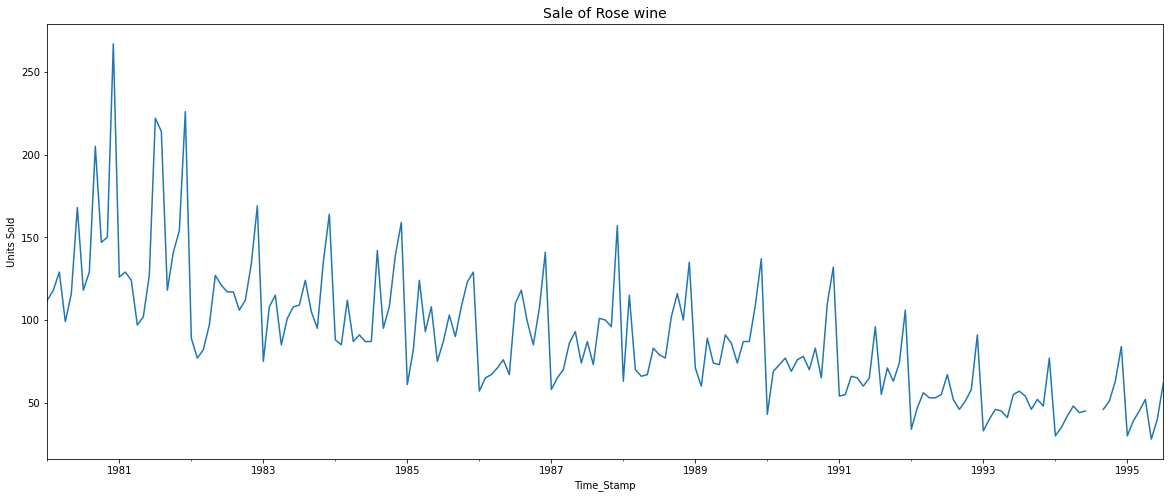

In [390]:
rcParams['figure.figsize'] = 20,8

df.Rose.plot()
plt.title('Sale of Rose wine', fontsize=14)
plt.ylabel('Units Sold')
plt.show();


In [391]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


### Missing Values

In [392]:
df.isnull().sum()

Rose    2
dtype: int64

In [393]:
df[df.isna().any(axis=1)]


,Rose
Time_Stamp,
1994-07-01,NaN
1994-08-01,NaN


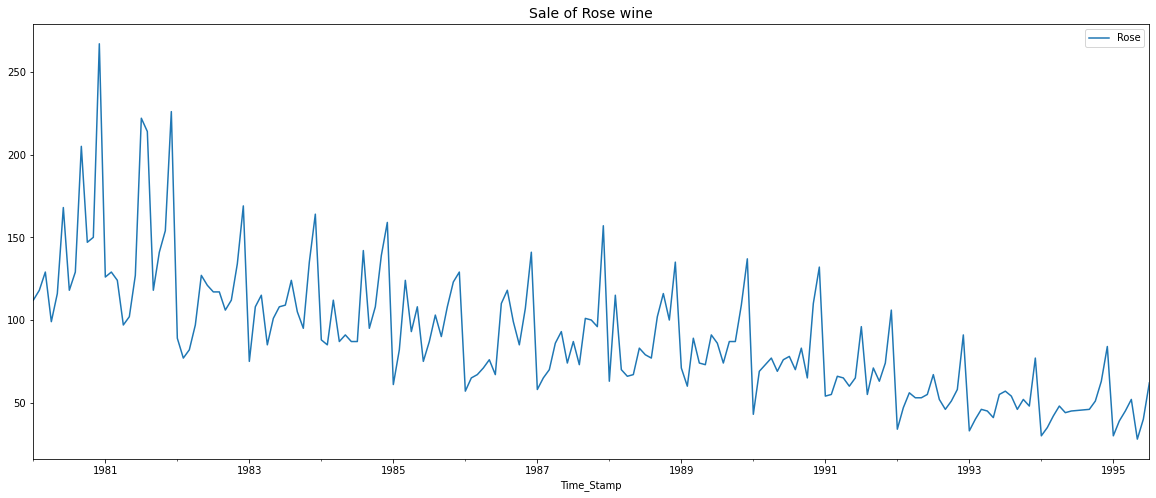

In [394]:
df=df.interpolate(method = 'linear')

df.plot();
plt.title('Sale of Rose wine', fontsize=14)

plt.show();

In [395]:
df[df.index=='1994-07-01']


,Rose
Time_Stamp,
1994-07-01,45.333333


In [396]:
df[df.index=='1994-08-01']

,Rose
Time_Stamp,
1994-08-01,45.666667


In [397]:
df.at['1994-08-01', 'Rose'] =int(df[df.index=='1994-08-01']['Rose'])
df[df.index=='1994-08-01']

,Rose
Time_Stamp,
1994-08-01,45.0


In [398]:
df.at['1994-07-01', 'Rose']=int(df[df.index=='1994-07-01']['Rose'])
df[df.index=='1994-07-01']

,Rose
Time_Stamp,
1994-07-01,45.0


### Monthly Sales

In [399]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years


Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


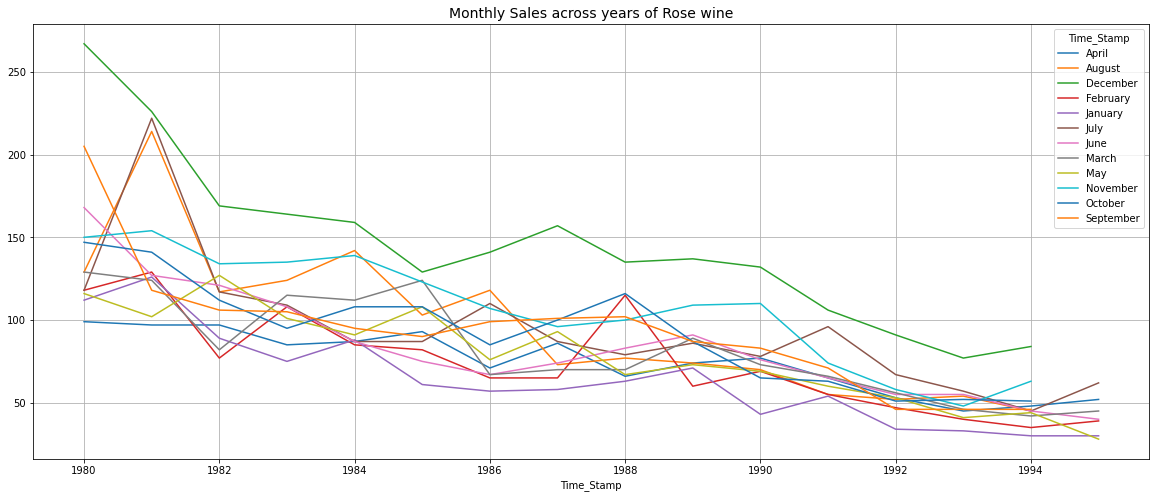

In [400]:
monthly_sales_across_years.plot()
plt.title('Monthly Sales across years of Rose wine', fontsize=14);

plt.grid();


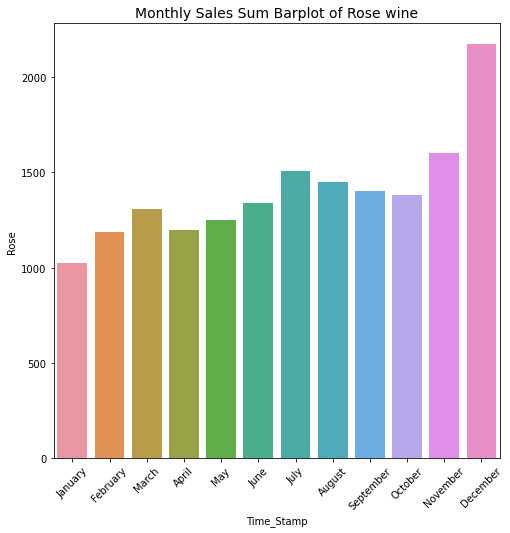

In [401]:
plt.figure(figsize=(8,8))
sns.barplot(df.index.month_name(),y='Rose',data=df,ci=False,estimator=sum);
plt.title('Monthly Sales Sum Barplot of Rose wine', fontsize=14);
plt.xticks(rotation=45);


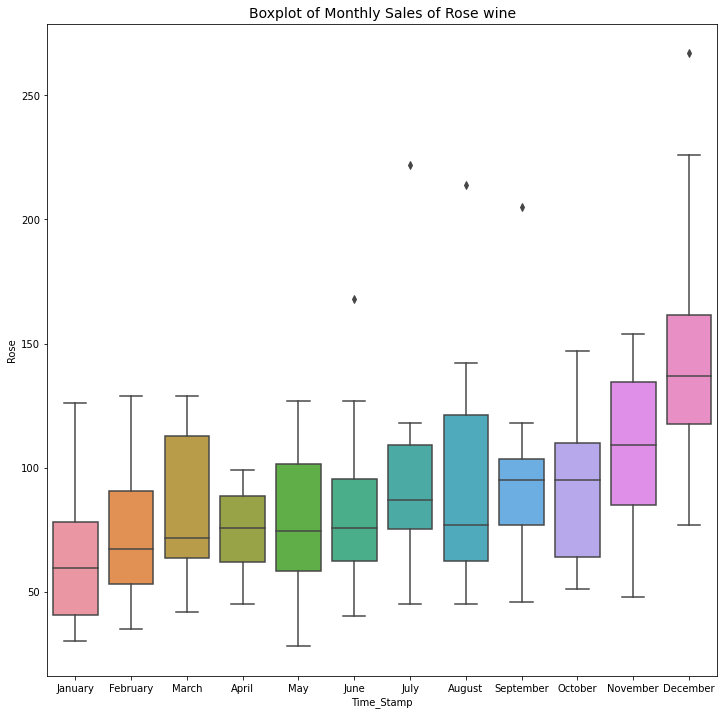

In [402]:
plt.figure(figsize=(12,12))
sns.boxplot(df.index.month_name(),y='Rose',data=df);
plt.title('Boxplot of Monthly Sales of Rose wine', fontsize=14);


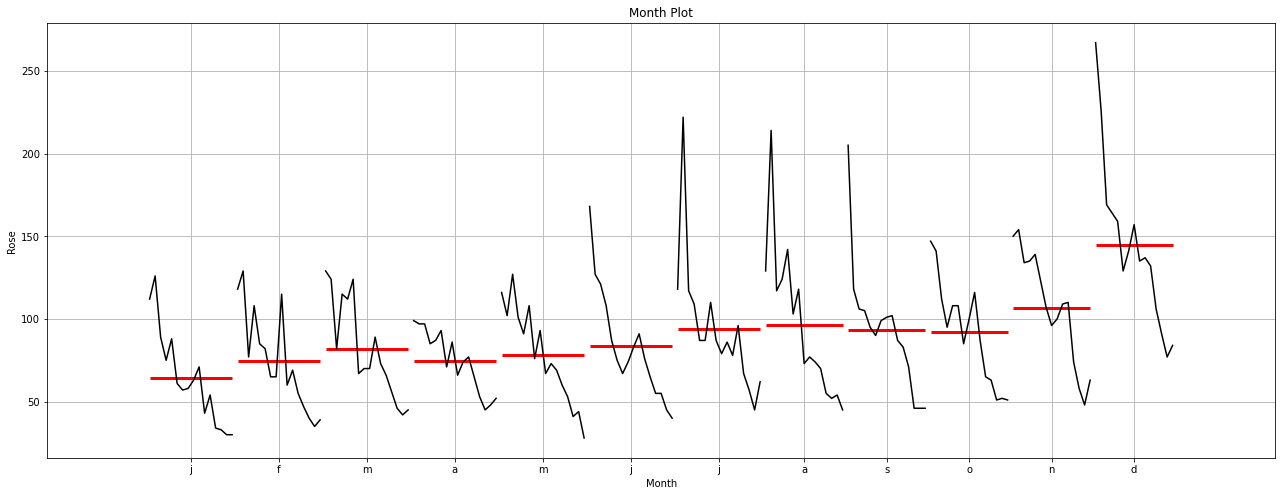

In [403]:
fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Rose',ax=ax);
plt.title('Month Plot')
plt.xlabel('Month')

plt.grid();


### Quarterly Sales

In [404]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.quarter, index = df.index.year)
quarterly_sales_across_years


Time_Stamp,1,2,3,4
Time_Stamp,,,,
1980,119.666667,127.666667,150.666667,188.000000
1981,126.333333,108.666667,184.666667,173.666667
1982,82.666667,115.000000,113.333333,138.333333
1983,99.333333,98.000000,112.666667,131.333333
1984,95.000000,88.333333,108.000000,135.333333
1985,89.000000,92.000000,93.333333,120.000000
1986,63.000000,71.333333,109.000000,111.000000
1987,64.333333,84.333333,87.000000,117.666667
1988,82.666667,72.000000,86.000000,117.000000


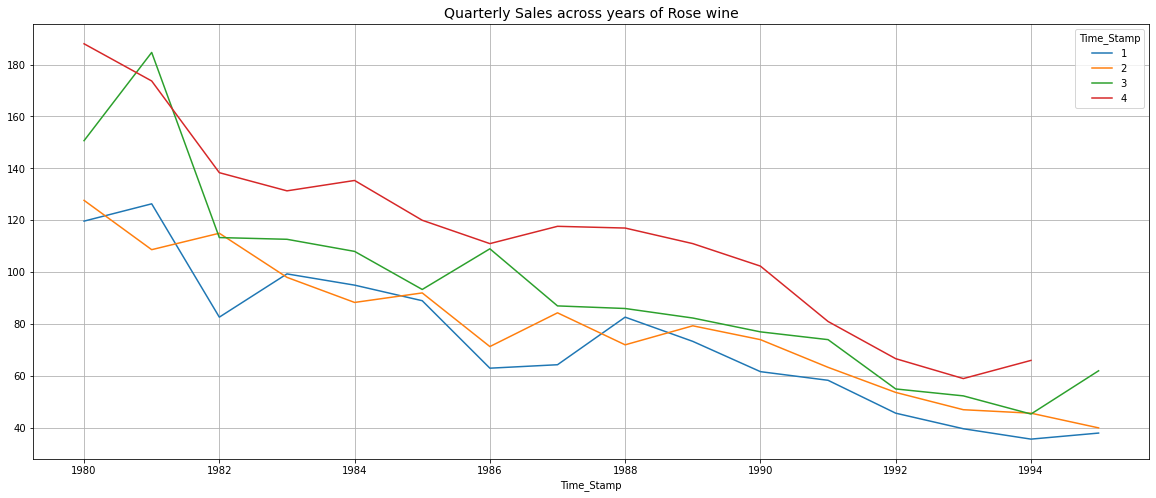

In [405]:
quarterly_sales_across_years.plot()
plt.title('Quarterly Sales across years of Rose wine', fontsize=14);

plt.grid();


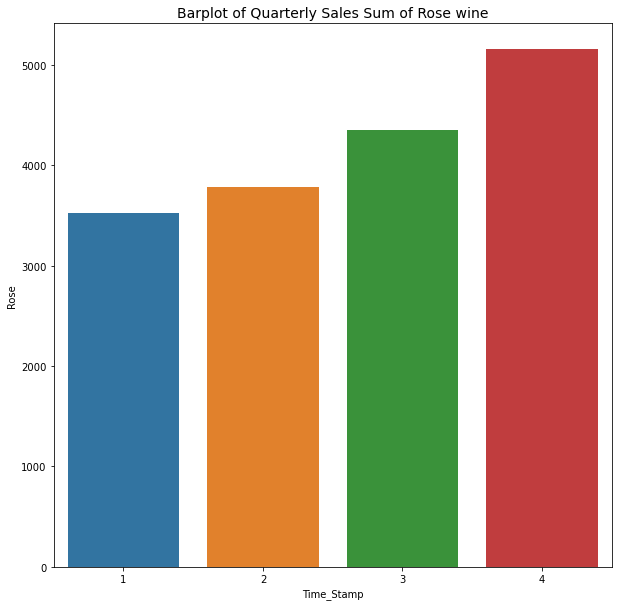

In [406]:
plt.figure(figsize=(10,10))
sns.barplot(df.index.quarter,y='Rose',data=df,ci=False, estimator=sum);
plt.title('Barplot of Quarterly Sales Sum of Rose wine', fontsize=14);


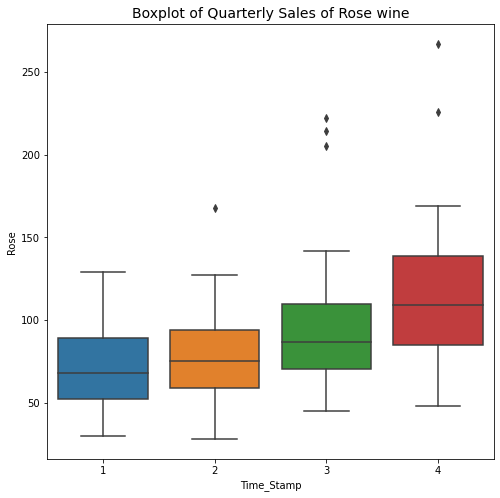

In [407]:
plt.figure(figsize=(8,8))

sns.boxplot(x = df.index.quarter,y = 'Rose',data=df);
plt.title('Boxplot of Quarterly Sales of Rose wine', fontsize=14);


### Yearly Sales

In [408]:
dfg=df.groupby(df.index.year).mean()
dfg

,Rose
Time_Stamp,
1980,146.500000
1981,148.333333
1982,112.333333
1983,110.333333
1984,106.666667
1985,98.583333
1986,88.583333
1987,88.333333
1988,89.416667


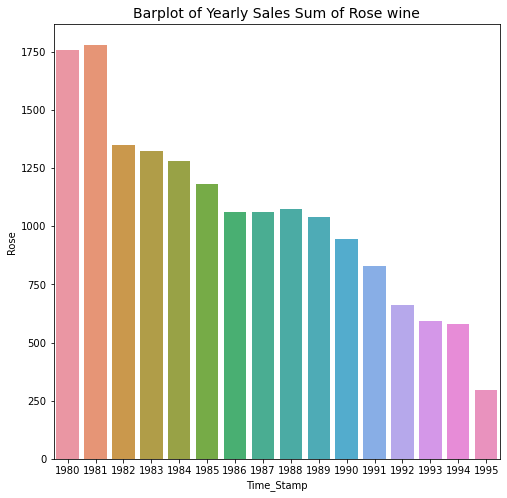

In [409]:
plt.figure(figsize=(8,8))
sns.barplot(df.index.year,y='Rose',data=df,ci=False,estimator=sum);
plt.title('Barplot of Yearly Sales Sum of Rose wine', fontsize=14);


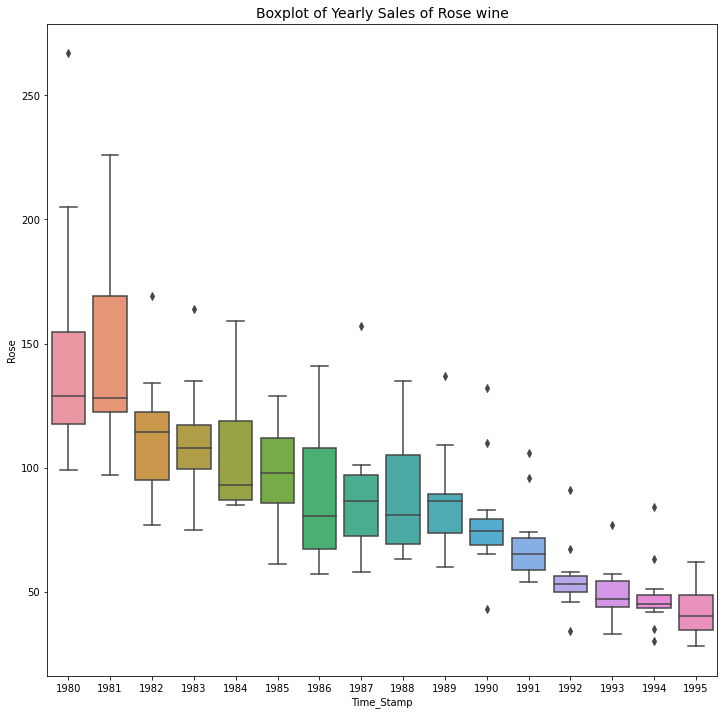

In [410]:
plt.figure(figsize=(12,12))

sns.boxplot(x = df.index.year,y = 'Rose',data=df);
plt.title('Boxplot of Yearly Sales of Rose wine', fontsize=14);


### Decomposition

                                  Additive Decomposition of Rose wine


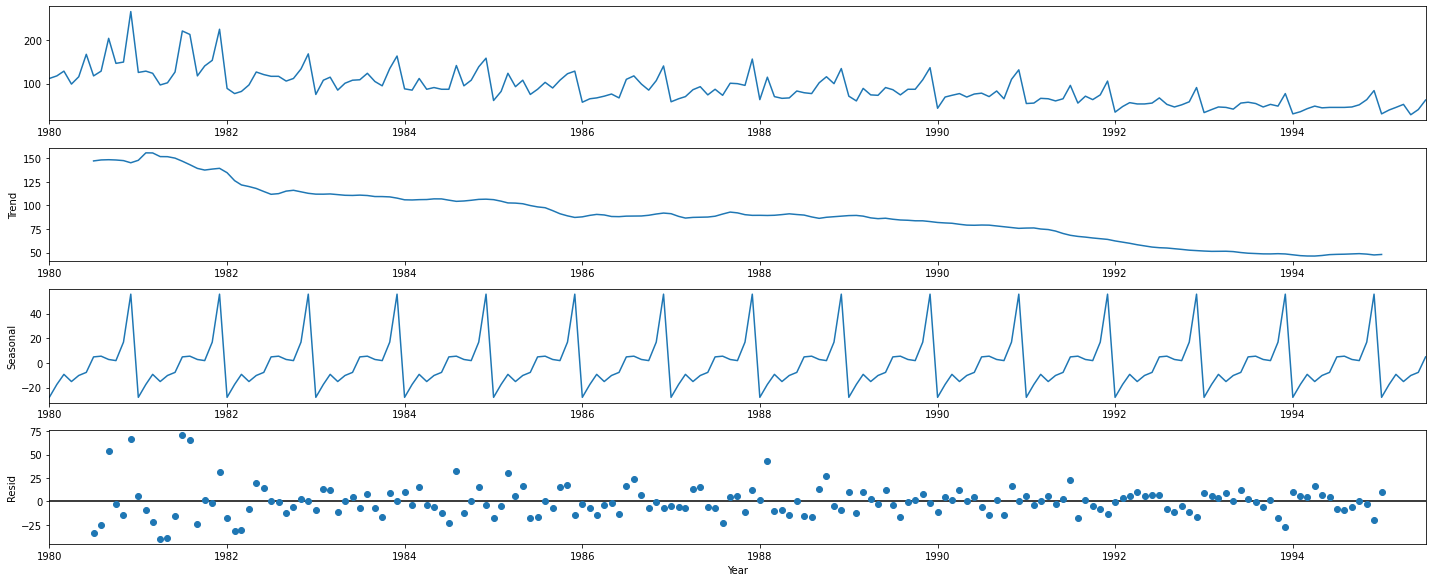

In [411]:
decomposition_add = seasonal_decompose(df,model='additive')
print("                                  Additive Decomposition of Rose wine")
decomposition_add.plot();
plt.xlabel('Year');

In [412]:
trend_add = decomposition_add.trend
seasonality_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

print('Additive Trend','\n',trend_add.head(12),'\n')
print('Additive Seasonality','\n',seasonality_add.head(12),'\n')
print('Additive Residual','\n',residual_add.head(12),'\n')

Additive Trend 
 Time_Stamp
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Additive Seasonality 
 Time_Stamp
1980-01-01   -27.903092
1980-02-01   -17.431663
1980-03-01    -9.279878
1980-04-01   -15.092378
1980-05-01   -10.190592
1980-06-01    -7.672735
1980-07-01     4.880241
1980-08-01     5.460797
1980-09-01     2.780241
1980-10-01     1.877464
1980-11-01    16.852464
1980-12-01    55.719130
Name: seasonal, dtype: float64 

Additive Residual 
 Time_Stamp
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.963575
1980-08-01   -24.585797
1980-09-01    53.844759
1980-10-01    -2.960797
1980-11-01   -14

                                     Multiplicative Decomposition of Rose wine


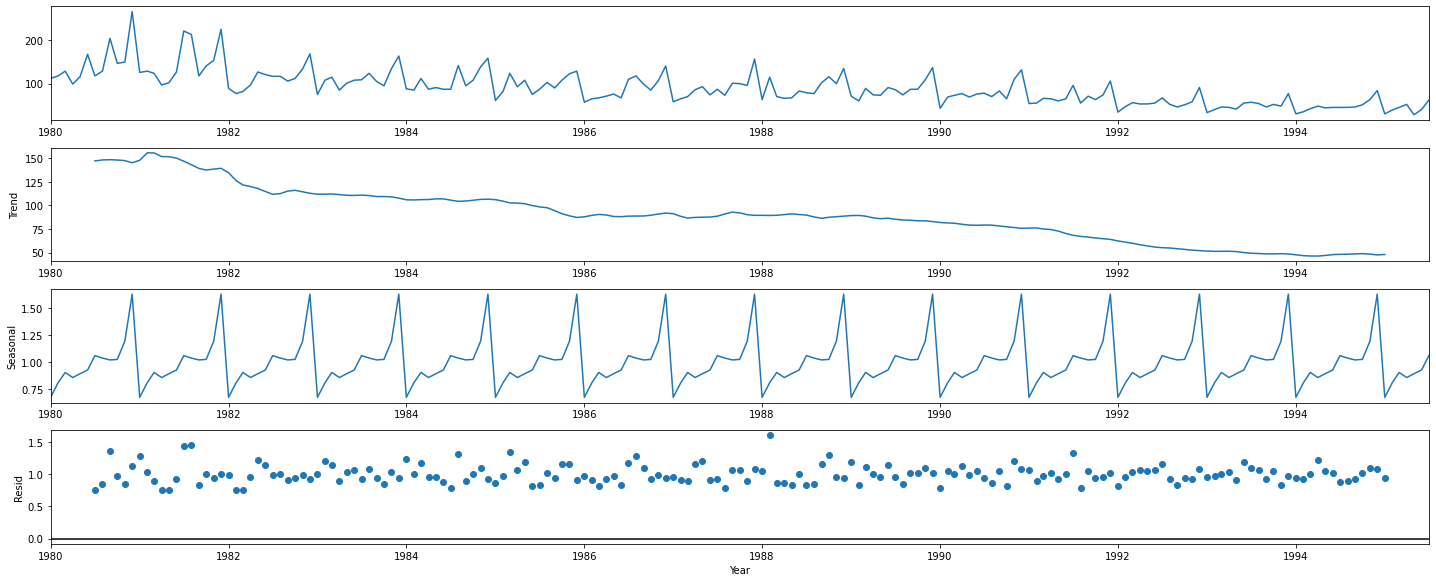

In [413]:
decomposition_mul = seasonal_decompose(df,model='multiplicative')
print("                                     Multiplicative Decomposition of Rose wine")
decomposition_mul.plot();
plt.xlabel('Year');


In [414]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

print('Multiplicative Trend','\n',trend_mul.head(12),'\n')
print('Multiplicative Seasonality','\n',seasonality_mul.head(12),'\n')
print('Multiplicative Residual','\n',residual_mul.head(12),'\n')

Multiplicative Trend 
 Time_Stamp
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Multiplicative Seasonality 
 Time_Stamp
1980-01-01    0.670182
1980-02-01    0.806224
1980-03-01    0.901278
1980-04-01    0.854154
1980-05-01    0.889531
1980-06-01    0.924099
1980-07-01    1.057682
1980-08-01    1.035066
1980-09-01    1.017753
1980-10-01    1.022688
1980-11-01    1.192494
1980-12-01    1.628848
Name: seasonal, dtype: float64 

Multiplicative Residual 
 Time_Stamp
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758514
1980-08-01    0.841382
1980-09-01    1.357534
1980-10-01    0.970661
1980-11-01    0.8532

## 3. Split the data into training and test. The test data should start in 1991.


In [415]:
train= df[df.index<'1991'] 
test = df[df.index>='1991']

In [416]:
train.head()

,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [417]:
test.head()

,Rose
Time_Stamp,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [418]:
train.shape

(132, 1)

In [419]:
test.shape

(55, 1)

In [420]:
train.tail()

,Rose
Time_Stamp,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [421]:
test.tail()

,Rose
Time_Stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.


### Simple Exponential Smoothing  Model

In [422]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [423]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_autofit = model_SES_autofit.forecast(steps=len(test))
SES_predict_autofit

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

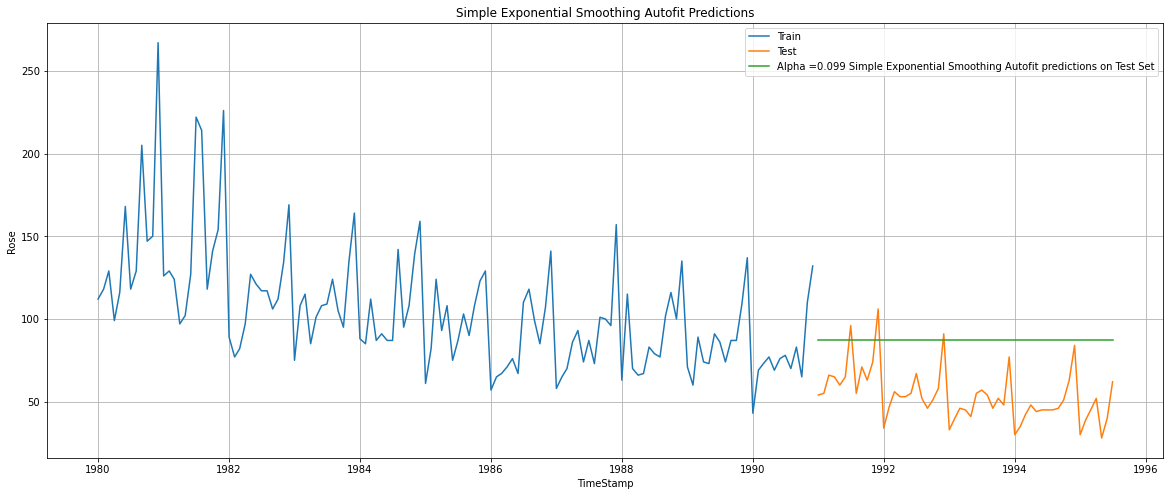

In [424]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict_autofit, label='Alpha =0.099 Simple Exponential Smoothing Autofit predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.title('Simple Exponential Smoothing Autofit Predictions');

### Model Evaluation

In [425]:
rmse_modelSES_test_autofit=round(metrics.mean_squared_error(test.values,SES_predict_autofit.values,squared=False),2)
print('SES Autofit RMSE:',rmse_modelSES_test_autofit)


SES Autofit RMSE: 36.82


In [426]:
resultsDf = pd.DataFrame({'Test RMSE': rmse_modelSES_test_autofit},index=['Alpha=0.099,SES Autofit'])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82


### Double Exponential Smoothing - Holt Autofit Model

In [427]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

print(model_DES_autofit.params)

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [428]:
# Forecasting using this model for the duration of the test set
DES_predict_autofit =  model_DES_autofit.forecast(len(test))
DES_predict_autofit

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

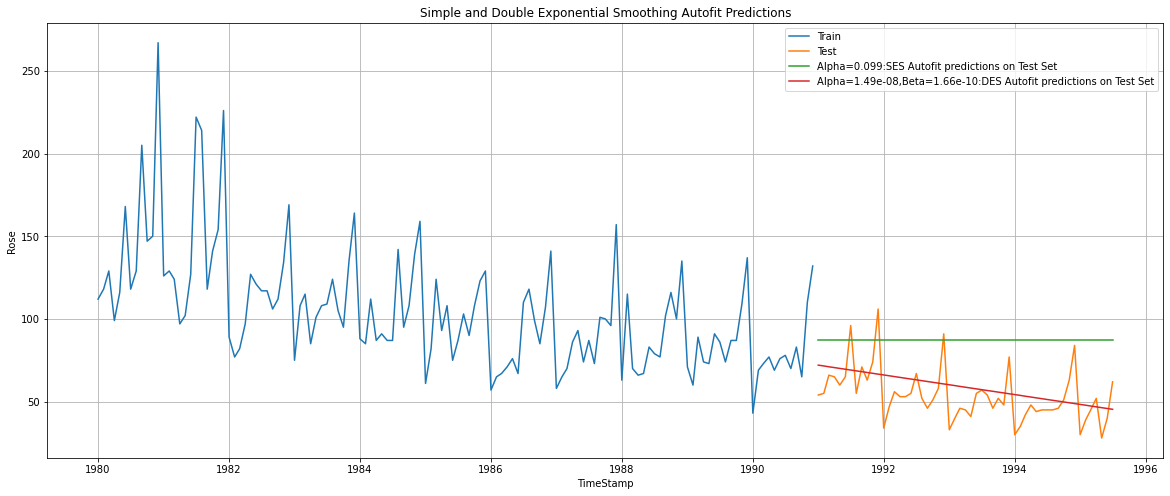

In [429]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict_autofit, label='Alpha=0.099:SES Autofit predictions on Test Set')
plt.plot(DES_predict_autofit, label='Alpha=1.49e-08,Beta=1.66e-10:DES Autofit predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.title('Simple and Double Exponential Smoothing Autofit Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

### Model Evaluation

In [430]:
rmse_modelDES_test_autofit=round(metrics.mean_squared_error(test.values,DES_predict_autofit.values,squared=False),2)
print('DES Autofit RMSE:',rmse_modelDES_test_autofit)

DES Autofit RMSE: 15.28


In [431]:
resultsDf_des = pd.DataFrame({'Test RMSE': [rmse_modelDES_test_autofit]}
                           ,index=['Alpha=1.49e-08,Beta=1.66e-10:DES Autofit'])

resultsDf = pd.concat([resultsDf, resultsDf_des])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28


###  Triple Exponential Smoothing - ETS(A, A, A) - Holt Winter's linear method with additive errors Autofit Model 

In [432]:
# Initializing the Double Exponential Smoothing Model
model_TES_a = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_a_autofit = model_TES_a.fit(optimized=True,use_brute=True)

print(model_TES_a_autofit.params)

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [433]:
# Forecasting using this model for the duration of the test set
TES_a_predict_autofit =  model_TES_a_autofit.forecast(len(test))
TES_a_predict_autofit

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


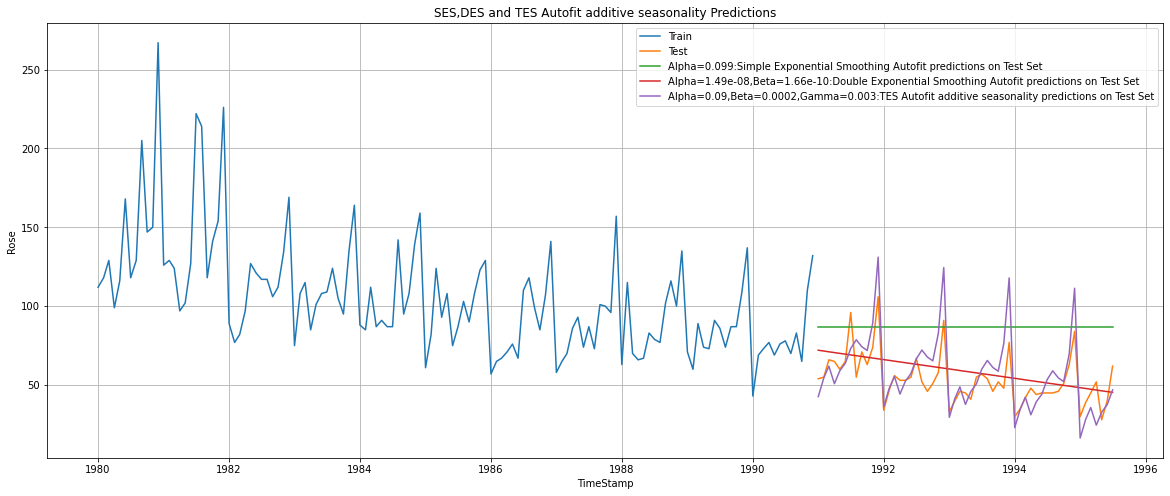

In [434]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict_autofit, label='Alpha=0.099:Simple Exponential Smoothing Autofit predictions on Test Set')
plt.plot(DES_predict_autofit, label='Alpha=1.49e-08,Beta=1.66e-10:Double Exponential Smoothing Autofit predictions on Test Set')
plt.plot(TES_a_predict_autofit, label='Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit additive seasonality predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.title('SES,DES and TES Autofit additive seasonality Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

### Model Evaluation

In [435]:
rmse_modelTESa_test_autofit=round(metrics.mean_squared_error(test.values,TES_a_predict_autofit.values,squared=False),2)
print('TES_A Autofit RMSE:',rmse_modelTESa_test_autofit)

TES_A Autofit RMSE: 14.26


In [436]:
resultsDf_tesA_autofit = pd.DataFrame({'Test RMSE': [rmse_modelTESa_test_autofit]}
                           ,index=['Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit'])

resultsDf = pd.concat([resultsDf, resultsDf_tesA_autofit])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26


### Triple Exponential Smoothing - ETS(A, A, M) - Holt Winter's linear method with multiplicative errors 

In [437]:
# Initializing the Double Exponential Smoothing Model
model_TES_m = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_m_autofit = model_TES_m.fit(optimized=True,use_brute=True)

print(model_TES_m_autofit.params)

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [438]:
# Forecasting using this model for the duration of the test set
TES_m_predict_autofit =  model_TES_m_autofit.forecast(len(test))
TES_m_predict_autofit

1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
1994-03-01     61.368082
1994-04-01     53.438682


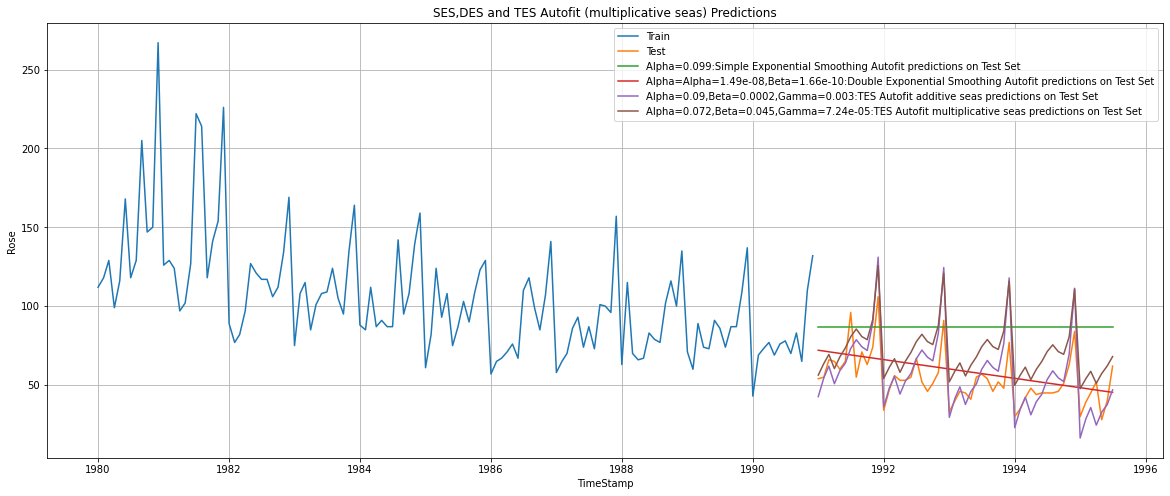

In [439]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict_autofit, label='Alpha=0.099:Simple Exponential Smoothing Autofit predictions on Test Set')
plt.plot(DES_predict_autofit, label='Alpha=Alpha=1.49e-08,Beta=1.66e-10:Double Exponential Smoothing Autofit predictions on Test Set')
plt.plot(TES_a_predict_autofit, label='Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit additive seas predictions on Test Set')
plt.plot(TES_m_predict_autofit, label='Alpha=0.072,Beta=0.045,Gamma=7.24e-05:TES Autofit multiplicative seas predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.title('SES,DES and TES Autofit (multiplicative seas) Predictions');

### Model Evaluation

In [440]:
rmse_modelTESm_test_autofit=round(metrics.mean_squared_error(test.values,TES_m_predict_autofit.values,squared=False),2)
print('TES_m Autofit RMSE:',rmse_modelTESm_test_autofit)

TES_m Autofit RMSE: 20.18


In [441]:
resultsDf_tesM = pd.DataFrame({'Test RMSE': [rmse_modelTESm_test_autofit]}
                           ,index=['Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit'])

resultsDf = pd.concat([resultsDf, resultsDf_tesM])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18


## Iterative Method for Simple Exponential Smoothing

In [442]:
SES_train=train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

results_1 = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
results_1

,Alpha Values,Test RMSE


In [443]:
for i in np.arange(0.1,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    
    rmse_modelSES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    results_1 = results_1.append({'Alpha Values':i,'Test RMSE':rmse_modelSES_test_i}, ignore_index=True)

In [444]:
results_1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
0,0.1,36.848684
1,0.2,41.382452
2,0.3,47.525251
3,0.4,53.787686
4,0.5,59.661932
5,0.6,64.991324
6,0.7,69.718108
7,0.8,73.793865
8,0.9,77.159094
9,1.0,79.738550


In [445]:
SES_test.head()

,Rose,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)","(predict, 1.0)"
Time_Stamp,,,,,,,,,,,
1991-01-01,54.0,87.140165,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-02-01,55.0,87.140165,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-03-01,66.0,87.140165,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-04-01,65.0,87.140165,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0
1991-05-01,60.0,87.140165,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777,132.0


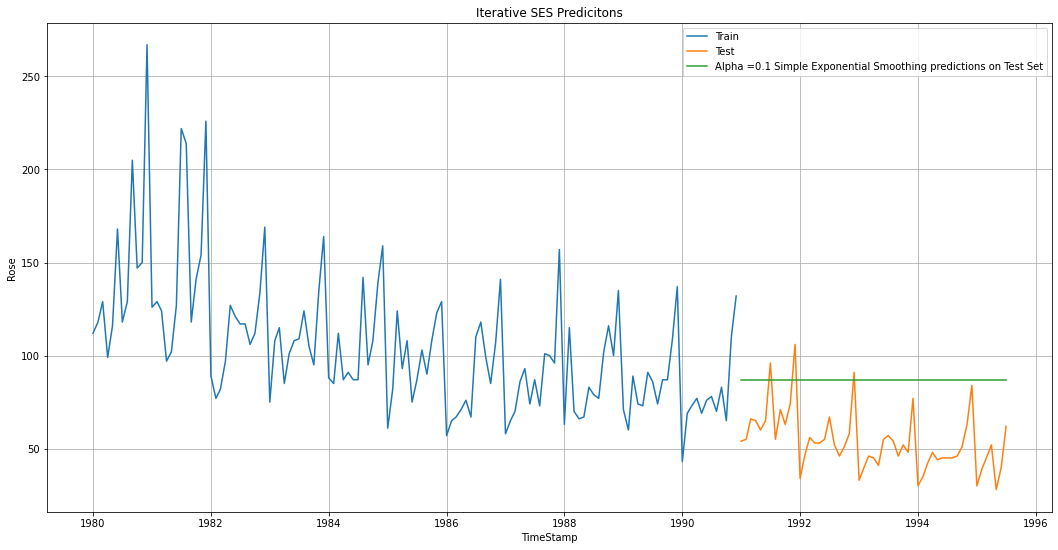

In [446]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')


plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.title('Iterative SES Predicitons')
plt.legend(loc='best')
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

In [447]:
rmse_iter_ses=round(results_1.sort_values(by=['Test RMSE'],ascending=True).values[0][1],2)
print('Iterative SES RMSE:',rmse_iter_ses)

Iterative SES RMSE: 36.85


In [448]:
resultsDf_SESiter = pd.DataFrame({'Test RMSE': [rmse_iter_ses]}
                           ,index=['Alpha=0.1 SES Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_SESiter])
resultsDf


,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85


## Iterative Method for Double Exponential Smoothing

In [449]:
DES_test = test.copy()
DES_train = train.copy()

model_DES = Holt(train,initialization_method='estimated')

results_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
results_2

,Alpha Values,Beta Values,Test RMSE


In [450]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        #DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        #rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_modelDEs_test_i = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        results_2 = results_2.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_modelDEs_test_i}, ignore_index=True)

In [451]:
DES_test.head()

,Rose,"(predict, 0.1, 0.1)","(predict, 0.1, 0.2)","(predict, 0.1, 0.30000000000000004)","(predict, 0.1, 0.4)","(predict, 0.1, 0.5)","(predict, 0.1, 0.6)","(predict, 0.1, 0.7000000000000001)","(predict, 0.1, 0.8)","(predict, 0.1, 0.9)","(predict, 0.1, 1.0)","(predict, 0.2, 0.1)","(predict, 0.2, 0.2)","(predict, 0.2, 0.30000000000000004)","(predict, 0.2, 0.4)","(predict, 0.2, 0.5)","(predict, 0.2, 0.6)","(predict, 0.2, 0.7000000000000001)","(predict, 0.2, 0.8)","(predict, 0.2, 0.9)","(predict, 0.2, 1.0)","(predict, 0.30000000000000004, 0.1)","(predict, 0.30000000000000004, 0.2)","(predict, 0.30000000000000004, 0.30000000000000004)","(predict, 0.30000000000000004, 0.4)","(predict, 0.30000000000000004, 0.5)","(predict, 0.30000000000000004, 0.6)","(predict, 0.30000000000000004, 0.7000000000000001)","(predict, 0.30000000000000004, 0.8)","(predict, 0.30000000000000004, 0.9)","(predict, 0.30000000000000004, 1.0)","(predict, 0.4, 0.1)","(predict, 0.4, 0.2)","(predict, 0.4, 0.30000000000000004)","(predict, 0.4, 0.4)","(predict, 0.4, 0.5)","(predict, 0.4, 0.6)","(predict, 0.4, 0.7000000000000001)","(predict, 0.4, 0.8)","(predict, 0.4, 0.9)","(predict, 0.4, 1.0)","(predict, 0.5, 0.1)","(predict, 0.5, 0.2)","(predict, 0.5, 0.30000000000000004)","(predict, 0.5, 0.4)","(predict, 0.5, 0.5)","(predict, 0.5, 0.6)","(predict, 0.5, 0.7000000000000001)","(predict, 0.5, 0.8)","(predict, 0.5, 0.9)","(predict, 0.5, 1.0)","(predict, 0.6, 0.1)","(predict, 0.6, 0.2)","(predict, 0.6, 0.30000000000000004)","(predict, 0.6, 0.4)","(predict, 0.6, 0.5)","(predict, 0.6, 0.6)","(predict, 0.6, 0.7000000000000001)","(predict, 0.6, 0.8)","(predict, 0.6, 0.9)","(predict, 0.6, 1.0)","(predict, 0.7000000000000001, 0.1)","(predict, 0.7000000000000001, 0.2)","(predict, 0.7000000000000001, 0.30000000000000004)","(predict, 0.7000000000000001, 0.4)","(predict, 0.7000000000000001, 0.5)","(predict, 0.7000000000000001, 0.6)","(predict, 0.7000000000000001, 0.7000000000000001)","(predict, 0.7000000000000001, 0.8)","(predict, 0.7000000000000001, 0.9)","(predict, 0.7000000000000001, 1.0)","(predict, 0.8, 0.1)","(predict, 0.8, 0.2)","(predict, 0.8, 0.30000000000000004)","(predict, 0.8, 0.4)","(predict, 0.8, 0.5)","(predict, 0.8, 0.6)","(predict, 0.8, 0.7000000000000001)","(predict, 0.8, 0.8)","(predict, 0.8, 0.9)","(predict, 0.8, 1.0)","(predict, 0.9, 0.1)","(predict, 0.9, 0.2)","(predict, 0.9, 0.30000000000000004)","(predict, 0.9, 0.4)","(predict, 0.9, 0.5)","(predict, 0.9, 0.6)","(predict, 0.9, 0.7000000000000001)","(predict, 0.9, 0.8)","(predict, 0.9, 0.9)","(predict, 0.9, 1.0)","(predict, 1.0, 0.1)","(predict, 1.0, 0.2)","(predict, 1.0, 0.30000000000000004)","(predict, 1.0, 0.4)","(predict, 1.0, 0.5)","(predict, 1.0, 0.6)","(predict, 1.0, 0.7000000000000001)","(predict, 1.0, 0.8)","(predict, 1.0, 0.9)","(predict, 1.0, 1.0)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,54.0,83.850852,81.260328,82.266967,82.476159,82.236662,82.423872,83.746840,84.749283,84.827744,85.173643,90.543059,91.337077,92.875267,94.939806,97.456488,100.478736,103.902229,107.949354,113.207355,119.702716,99.149867,101.740622,105.207496,109.329492,113.982720,118.930390,123.501771,126.698654,128.036454,127.981699,107.338633,111.259769,115.838222,120.581833,124.913476,128.250692,130.457470,131.988128,133.469902,135.309045,114.589675,119.250901,124.117590,128.584597,132.287813,135.295862,138.015425,140.842537,143.969444,147.402924,120.882222,125.932181,130.857152,135.234686,139.045602,142.552857,146.022775,149.553694,153.081839,156.457736,126.282706,131.549846,136.518826,140.955283,144.957567,148.710781,152.299389,155.685706,158.782489,161.526660,130.802985,136.152287,141.089383,145.480926,149.419478,152.998217,156.227267,159.066863,161.479371,163.446966,134.398664,139.670132,144.410927,148.528508,152.082958,155.113762,157.606388,159.520839,160.812452,161.432269,136.984432,141.975918,146.284705,149.826392,152.623530,154.671795,155.92

In [452]:
results_2.sort_values(by=['Test RMSE'],ascending=True).head(10)

,Alpha Values,Beta Values,Test RMSE
0,0.1,0.1,36.900871
1,0.1,0.2,48.657789
10,0.2,0.1,65.754759
2,0.1,0.3,78.150329
20,0.3,0.1,98.676734
3,0.1,0.4,99.681595
11,0.2,0.2,114.058193
4,0.1,0.5,124.206311
30,0.4,0.1,129.002112
40,0.5,0.1,155.382399


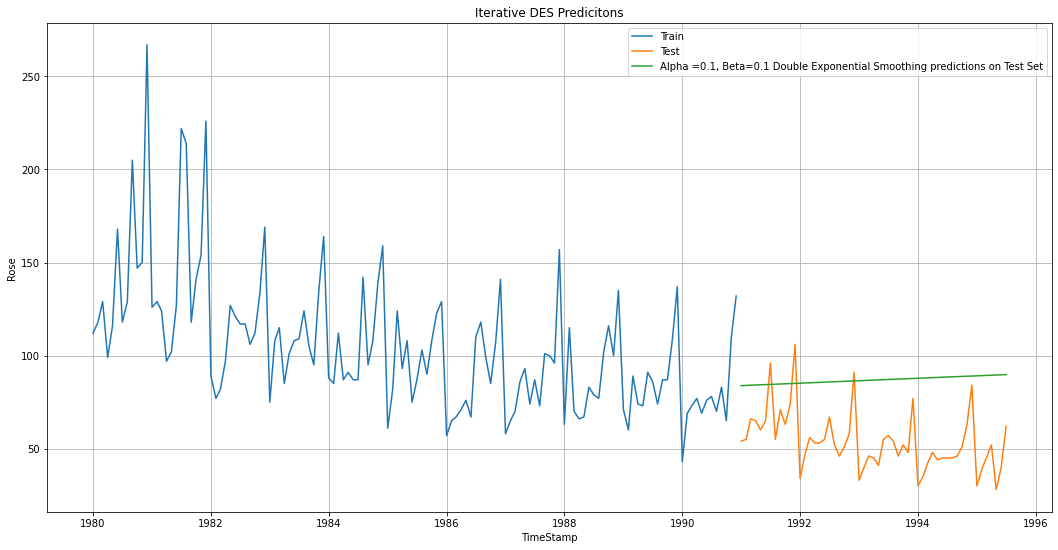

In [453]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')


plt.plot(DES_test['predict',0.1,0.1], label='Alpha =0.1, Beta=0.1 Double Exponential Smoothing predictions on Test Set')


plt.title('Iterative DES Predicitons')
plt.legend(loc='best')
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

In [454]:
rmse_iter_DES=round(results_2.sort_values(by=['Test RMSE'],ascending=True).values[0][2],2)
print('Iterative DES RMSE:',rmse_iter_DES)

Iterative DES RMSE: 36.9


In [455]:
resultsDf_DESiter = pd.DataFrame({'Test RMSE': [rmse_iter_DES]}
                           ,index=['Alpha=0.1 , Beta=0.1,DES Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_DESiter])
resultsDf


,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90


### Iterative Method - Triple Exponential Smoothing - ETS(A, A, A)

In [456]:
TES_train_a = train.copy()
TES_test_a = test.copy()

In [457]:
model_TES_a = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
results_3 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results_3

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [458]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_a.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_a['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_a['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            #rmse_model8_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES_test = metrics.mean_squared_error(TES_test_a['Rose'],TES_test_a['predict',i,j,k],squared=False)
            
            results_3 = results_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_modelTES_test}
                                                 , ignore_index=True)

In [459]:
results_3.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Test RMSE
32,0.1,0.4,0.3,11.973601
22,0.1,0.3,0.3,12.031354
12,0.1,0.2,0.3,12.076021
13,0.1,0.2,0.4,12.079340
23,0.1,0.3,0.4,12.218737


In [460]:
pd. set_option("display.max_columns", None) 

In [461]:
TES_test_a.head()

,Rose,"(predict, 0.1, 0.1, 0.1)","(predict, 0.1, 0.1, 0.2)","(predict, 0.1, 0.1, 0.30000000000000004)","(predict, 0.1, 0.1, 0.4)","(predict, 0.1, 0.1, 0.5)","(predict, 0.1, 0.1, 0.6)","(predict, 0.1, 0.1, 0.7000000000000001)","(predict, 0.1, 0.1, 0.8)","(predict, 0.1, 0.1, 0.9)","(predict, 0.1, 0.1, 1.0)","(predict, 0.1, 0.2, 0.1)","(predict, 0.1, 0.2, 0.2)","(predict, 0.1, 0.2, 0.30000000000000004)","(predict, 0.1, 0.2, 0.4)","(predict, 0.1, 0.2, 0.5)","(predict, 0.1, 0.2, 0.6)","(predict, 0.1, 0.2, 0.7000000000000001)","(predict, 0.1, 0.2, 0.8)","(predict, 0.1, 0.2, 0.9)","(predict, 0.1, 0.2, 1.0)","(predict, 0.1, 0.30000000000000004, 0.1)","(predict, 0.1, 0.30000000000000004, 0.2)","(predict, 0.1, 0.30000000000000004, 0.30000000000000004)","(predict, 0.1, 0.30000000000000004, 0.4)","(predict, 0.1, 0.30000000000000004, 0.5)","(predict, 0.1, 0.30000000000000004, 0.6)","(predict, 0.1, 0.30000000000000004, 0.7000000000000001)","(predict, 0.1, 0.30000000000000004, 0.8)","(predict, 0.1, 0.30000000000000004, 0.9)","(predict, 0.1, 0.30000000000000004, 1.0)","(predict, 0.1, 0.4, 0.1)","(predict, 0.1, 0.4, 0.2)","(predict, 0.1, 0.4, 0.30000000000000004)","(predict, 0.1, 0.4, 0.4)","(predict, 0.1, 0.4, 0.5)","(predict, 0.1, 0.4, 0.6)","(predict, 0.1, 0.4, 0.7000000000000001)","(predict, 0.1, 0.4, 0.8)","(predict, 0.1, 0.4, 0.9)","(predict, 0.1, 0.4, 1.0)","(predict, 0.1, 0.5, 0.1)","(predict, 0.1, 0.5, 0.2)","(predict, 0.1, 0.5, 0.30000000000000004)","(predict, 0.1, 0.5, 0.4)","(predict, 0.1, 0.5, 0.5)","(predict, 0.1, 0.5, 0.6)","(predict, 0.1, 0.5, 0.7000000000000001)","(predict, 0.1, 0.5, 0.8)","(predict, 0.1, 0.5, 0.9)","(predict, 0.1, 0.5, 1.0)","(predict, 0.1, 0.6, 0.1)","(predict, 0.1, 0.6, 0.2)","(predict, 0.1, 0.6, 0.30000000000000004)","(predict, 0.1, 0.6, 0.4)","(predict, 0.1, 0.6, 0.5)","(predict, 0.1, 0.6, 0.6)","(predict, 0.1, 0.6, 0.7000000000000001)","(predict, 0.1, 0.6, 0.8)","(predict, 0.1, 0.6, 0.9)","(predict, 0.1, 0.6, 1.0)","(predict, 0.1, 0.7000000000000001, 0.1)","(predict, 0.1, 0.7000000000000001, 0.2)","(predict, 0.1, 0.7000000000000001, 0.30000000000000004)","(predict, 0.1, 0.7000000000000001, 0.4)","(predict, 0.1, 0.7000000000000001, 0.5)","(predict, 0.1, 0.7000000000000001, 0.6)","(predict, 0.1, 0.7000000000000001, 0.7000000000000001)","(predict, 0.1, 0.7000000000000001, 0.8)","(predict, 0.1, 0.7000000000000001, 0.9)","(predict, 0.1, 0.7000000000000001, 1.0)","(predict, 0.1, 0.8, 0.1)","(predict, 0.1, 0.8, 0.2)","(predict, 0.1, 0.8, 0.30000000000000004)","(predict, 0.1, 0.8, 0.4)","(predict, 0.1, 0.8, 0.5)","(predict, 0.1, 0.8, 0.6)","(predict, 0.1, 0.8, 0.7000000000000001)","(predict, 0.1, 0.8, 0.8)","(predict, 0.1, 0.8, 0.9)","(predict, 0.1, 0.8, 1.0)","(predict, 0.1, 0.9, 0.1)","(predict, 0.1, 0.9, 0.2)","(predict, 0.1, 0.9, 0.30000000000000004)","(predict, 0.1, 0.9, 0.4)","(predict, 0.1, 0.9, 0.5)","(predict, 0.1, 0.9, 0.6)","(predict, 0.1, 0.9, 0.7000000000000001)","(predict, 0.1, 0.9, 0.8)","(predict, 0.1, 0.9, 0.9)","(predict, 0.1, 0.9, 1.0)","(predict, 0.1, 1.0, 0.1)","(predict, 0.1, 1.0, 0.2)","(predict, 0.1, 1.0, 0.30000000000000004)","(predict, 0.1, 1.0, 0.4)","(predict, 0.1, 1.0, 0.5)","(predict, 0.1, 1.0, 0.6)","(predict, 0.1, 1.0, 0.7000000000000001)","(predict, 0.1, 1.0, 0.8)","(predict, 0.1, 1.0, 0.9)","(predict, 0.1, 1.0, 1.0)","(predict, 0.2, 0.1, 0.1)","(predict, 0.2, 0.1, 0.2)","(predict, 0.2, 0.1, 0.30000000000000004)","(predict, 0.2, 0.1, 0.4)","(predict, 0.2, 0.1, 0.5)","(predict, 0.2, 0.1, 0.6)","(predict, 0.2, 0.1, 0.7000000000000001)","(predict, 0.2, 0.1, 0.8)","(predict, 0.2, 0.1, 0.9)","(predict, 0.2, 0.1, 1.0)","(predict, 0.2, 0.2, 0.1)","(predict, 0.2, 0.2, 0.2)","(predict, 0.2, 0.2, 0.30000000000000004)","(predict, 0.2, 0.2, 0.4)","(predict, 0.2, 0.2, 0.5)","(predict, 0.2, 0.2, 0.6)","(predict, 0.2, 0.2, 0.7000000000000001)","(predict, 0.2, 0.2, 0.8)","(predict, 0.2, 0.2, 0.9)","(predict, 0.2, 0.2, 1.0)","(predict, 0.2, 0.30000000000000004, 0.1)","(predict, 0.2, 0.30000000000

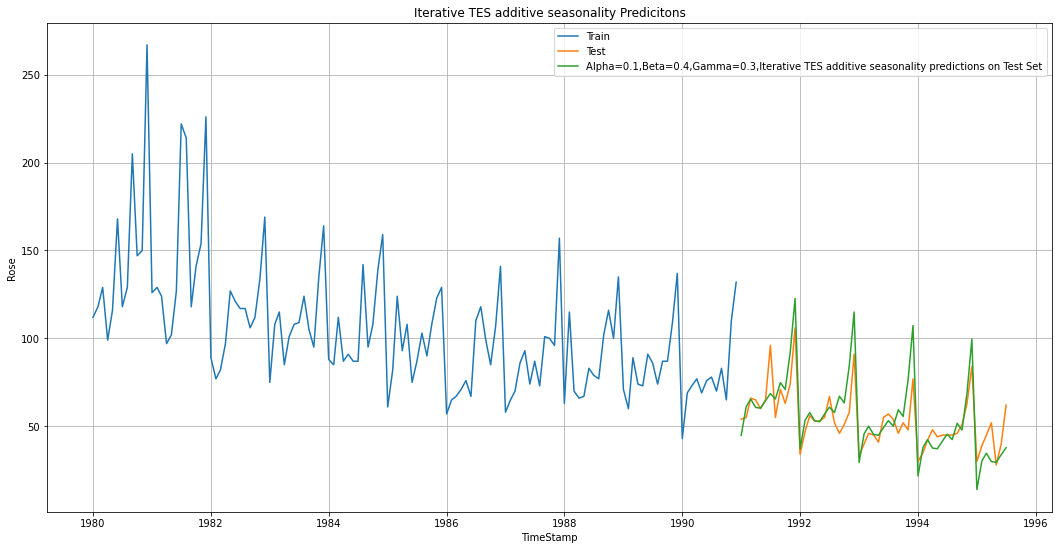

In [462]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_a['Rose'], label='Train')
plt.plot(TES_test_a['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_a['predict',0.1,0.4,0.30000000000000004], label='Alpha=0.1,Beta=0.4,Gamma=0.3,Iterative TES additive seasonality predictions on Test Set')

plt.title('Iterative TES additive seasonality Predicitons')
plt.legend(loc='best')
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

In [463]:
rmse_iter_TES_a=round(results_3.sort_values(by=['Test RMSE']).values[0][3],2)
print('Iterative TES additive seas RMSE:',rmse_iter_TES_a)

Iterative TES additive seas RMSE: 11.97


In [464]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_iter_TES_a]}
                           ,index=['Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97


### Iterative Method - Triple Exponential Smoothing - ETS(A, A, M)

In [465]:
TES_train_m = train.copy()
TES_test_m = test.copy()

In [466]:
model_TES_m = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
results_4 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results_4

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [467]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_m.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_m['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_m['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            #rmse_model8_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES_test = metrics.mean_squared_error(TES_test_m['Rose'],TES_test_m['predict',i,j,k],squared=False)
            
            results_4 = results_4.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_modelTES_test},ignore_index=True)
         

In [468]:
results_4.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Test RMSE
10,0.1,0.2,0.1,9.236464
11,0.1,0.2,0.2,9.505572
151,0.2,0.6,0.2,9.561249
142,0.2,0.5,0.3,9.884070
12,0.1,0.2,0.3,9.895300


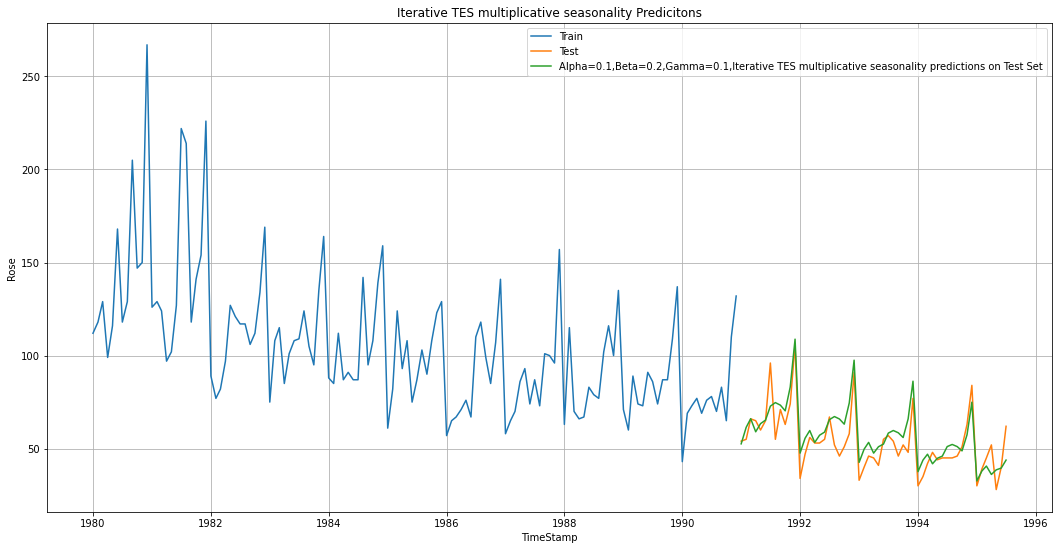

In [469]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_m['Rose'], label='Train')
plt.plot(TES_test_m['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_m['predict',0.1,0.2,0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,Iterative TES multiplicative seasonality predictions on Test Set')

plt.title('Iterative TES multiplicative seasonality Predicitons')
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.legend(loc='best')
plt.grid();

In [470]:
rmse_iter_TES_m=round(results_4.sort_values(by=['Test RMSE']).values[0][3],2)
print('Iterative TES multiplicative seas RMSE:',rmse_iter_TES_m)

Iterative TES multiplicative seas RMSE: 9.24


In [471]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_iter_TES_m]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24


### Linear Regression Model

In [472]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [473]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [474]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Time_Stamp,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose,time
Time_Stamp,,
1990-08-01,70.0,128
1990-09-01,83.0,129
1990-10-01,65.0,130
1990-11-01,110.0,131
1990-12-01,132.0,132


First few rows of Test Data


,Rose,time
Time_Stamp,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


Last few rows of Test Data


,Rose,time
Time_Stamp,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


In [475]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])


LinearRegression()

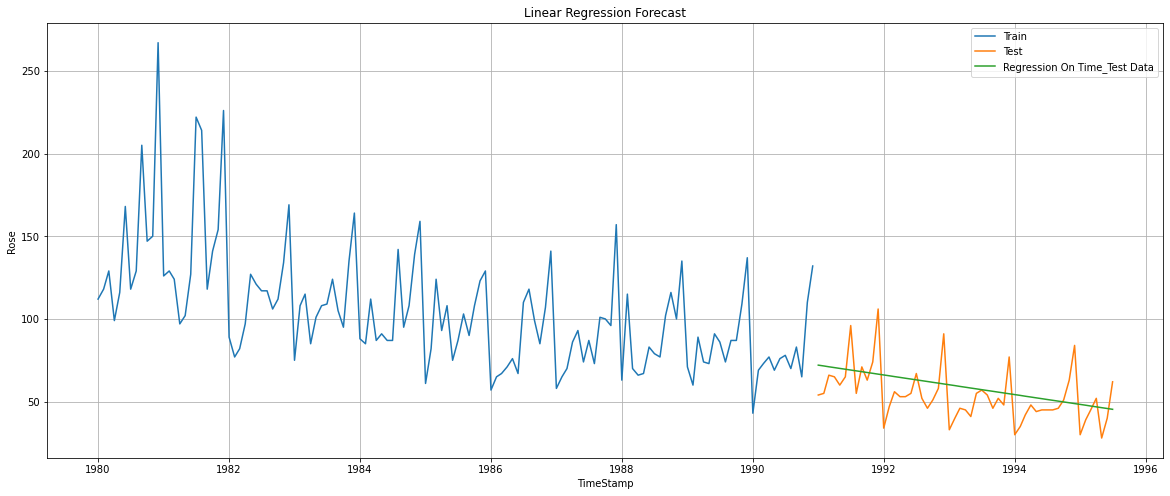

In [476]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [477]:
from sklearn import metrics

rmse_modelLR_test = round(metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False),2)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_modelLR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.280 


In [478]:
resultsDf_lr = pd.DataFrame({'Test RMSE': [rmse_modelLR_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_lr])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28


### Naive Forecast Model:

In [479]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [480]:
train.tail()

,Rose
Time_Stamp,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [481]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [482]:
print('First few rows of Test Data')
display(NaiveModel_test.head())
print('Last few rows of Test Data')
display(NaiveModel_test.tail())


First few rows of Test Data


,Rose,naive
Time_Stamp,,
1991-01-01,54.0,132.0
1991-02-01,55.0,132.0
1991-03-01,66.0,132.0
1991-04-01,65.0,132.0
1991-05-01,60.0,132.0


Last few rows of Test Data


,Rose,naive
Time_Stamp,,
1995-03-01,45.0,132.0
1995-04-01,52.0,132.0
1995-05-01,28.0,132.0
1995-06-01,40.0,132.0
1995-07-01,62.0,132.0


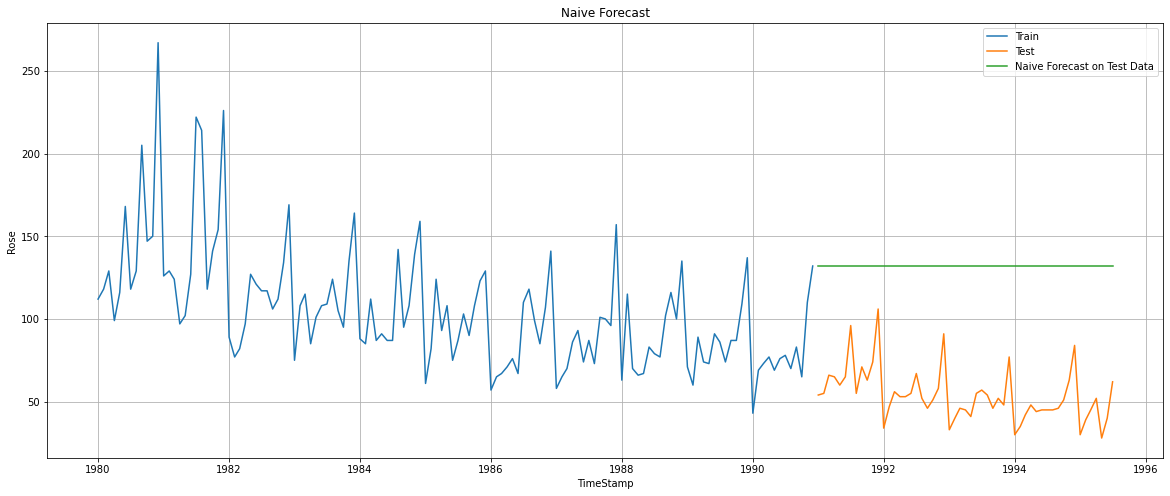

In [483]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [484]:
rmse_modelNB_test = round(metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False),2)
print("The RMSE for NaiveModel forecast on the Test Data is %2.2f" %(rmse_modelNB_test))

The RMSE for NaiveModel forecast on the Test Data is 79.74


In [485]:
resultsDf_nb = pd.DataFrame({'Test RMSE': [rmse_modelNB_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_nb])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


### Simple Average Model

In [486]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [487]:
train['Rose'].mean()

104.93939393939394

In [488]:
SimpleAverage_test['mean_forecast'] = int(train['Rose'].mean())
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-01,54.0,104
1991-02-01,55.0,104
1991-03-01,66.0,104
1991-04-01,65.0,104
1991-05-01,60.0,104


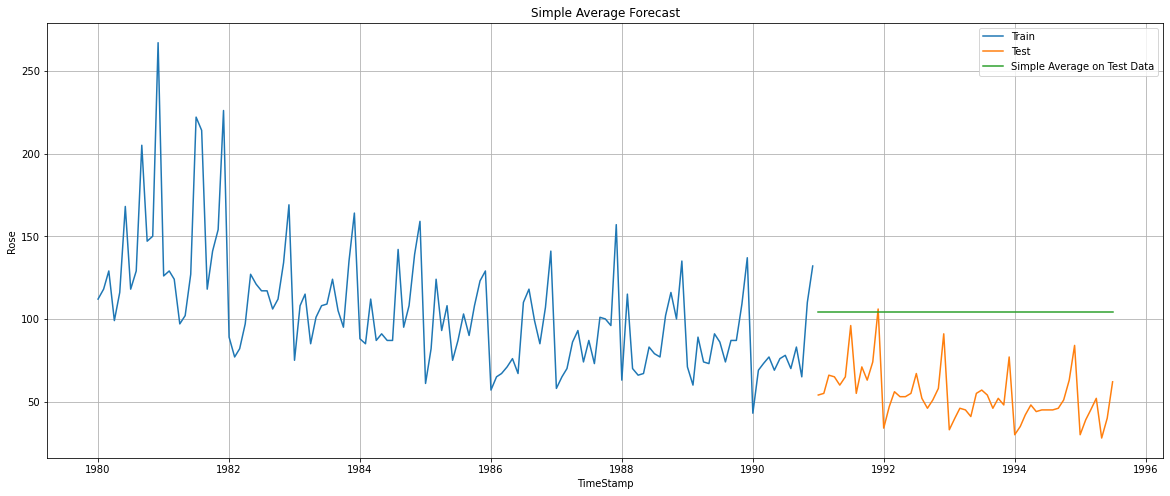

In [489]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [490]:
rmse_modelSA_test = round(metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False),2)
print("The RMSE for Simple Average forecast on the Test Data is %2.2f" %(rmse_modelSA_test))

The RMSE for Simple Average forecast on the Test Data is 52.58


In [491]:
resultsDf_sa = pd.DataFrame({'Test RMSE': [rmse_modelSA_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_sa])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


### Moving Average Forecast Model

In [492]:
MovingAverage_train = train.copy()
MovingAverage_test = test.copy()

In [493]:
MovingAverage_train['Trailing_2'] = MovingAverage_train['Rose'].rolling(2).mean()
MovingAverage_train['Trailing_3'] = MovingAverage_train['Rose'].rolling(3).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['Rose'].rolling(6).mean()
MovingAverage_train['Trailing_12'] = MovingAverage_train['Rose'].rolling(12).mean()

MovingAverage_train.tail()


,Rose,Trailing_2,Trailing_3,Trailing_6,Trailing_12
Time_Stamp,,,,,
1990-08-01,70.0,74.0,74.666667,73.833333,81.250000
1990-09-01,83.0,76.5,77.000000,75.500000,80.916667
1990-10-01,65.0,74.0,72.666667,73.500000,79.083333
1990-11-01,110.0,87.5,86.000000,80.333333,79.166667
1990-12-01,132.0,121.0,102.333333,89.666667,78.750000


In [494]:
MovingAverage_train.head()


,Rose,Trailing_2,Trailing_3,Trailing_6,Trailing_12
Time_Stamp,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,119.666667,NaN,NaN
1980-04-01,99.0,114.0,115.333333,NaN,NaN
1980-05-01,116.0,107.5,114.666667,NaN,NaN


In [495]:
MovingAverage_train['Trailing_12']

Time_Stamp
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
                ...    
1990-08-01    81.250000
1990-09-01    80.916667
1990-10-01    79.083333
1990-11-01    79.166667
1990-12-01    78.750000
Name: Trailing_12, Length: 132, dtype: float64

In [496]:
MovingAverage_test['pred_Trailing_2'] = 121
MovingAverage_test['pred_Trailing_3'] = 102                  ##102.333333
MovingAverage_test['pred_Trailing_6'] = 90                   ##89.666667
MovingAverage_test['pred_Trailing_12'] = 79                  ##78.750000


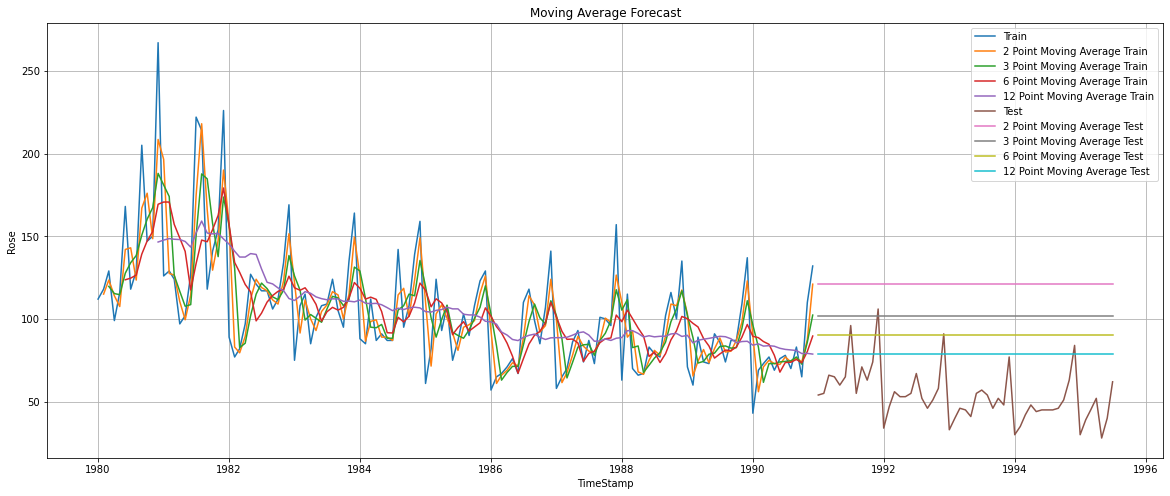

In [497]:
## Plotting on the whole data

plt.plot(MovingAverage_train['Rose'], label='Train')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_3'], label='3 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_12'],label = '12 Point Moving Average Train')
plt.plot(MovingAverage_test['Rose'], label='Test')

plt.plot(MovingAverage_test['pred_Trailing_2'], label='2 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_3'], label='3 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_6'],label = '6 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_12'],label = '12 Point Moving Average Test')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast")
plt.ylabel('Rose')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [498]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_modelMA_test_2 = round(metrics.mean_squared_error(test['Rose'],MovingAverage_test['pred_Trailing_2'],squared=False),2)
print("The RMSE for 2 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_modelMA_test_3 = round(metrics.mean_squared_error(test['Rose'],MovingAverage_test['pred_Trailing_3'],squared=False),2)
print("The RMSE for 3 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_3))

## Test Data - RMSE --> 6 point Trailing MA

rmse_modelMA_test_6 = round(metrics.mean_squared_error(test['Rose'],MovingAverage_test['pred_Trailing_6'],squared=False),2)
print("The RMSE for 6 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_6))

## Test Data - RMSE --> 12 point Trailing MA

rmse_modelMA_test_12 = round(metrics.mean_squared_error(test['Rose'],MovingAverage_test['pred_Trailing_12'],squared=False),2)
print("The RMSE for 12 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_12))

The RMSE for 2 point Moving Average Model forecast on the Test Data is  68.99
The RMSE for 3 point Moving Average Model forecast on the Test Data is  50.68
The RMSE for 6 point Moving Average Model forecast on the Test Data is  39.45
The RMSE for 12 point Moving Average Model forecast on the Test Data is  29.7


In [499]:
resultsDf_ma = pd.DataFrame({'Test RMSE': [rmse_modelMA_test_2,rmse_modelMA_test_3
                                          ,rmse_modelMA_test_6,rmse_modelMA_test_12]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_ma])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


In [500]:
def test_stationarity(timeseries):
    
    
    #Perform Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [501]:
test_stationarity(train['Rose'])


Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



Augmented  Dickey-Fuller  Test: A  formal  test  to  check  whether  time  series  data  follows stationary process
 
The hypothesis for the statistical test is:

H0-Null Hypothesis: Time series is non-stationary

H1-Alternate Hypothesis: Time series is stationary

The p-value obtained by the test should be less than the significance level (say 0.05) to reject the Null hypothesis or it fails to reject the Null hypothesis.

p value obtained from the test is 0.219 which is greater than 0.05 . Hence we fail to reject the Null Hypothesis and so we can say that data is non-stationary.

To convert the data into a stationary one, the difference of a Dataframe value with the value in the previous row is taken and remove missing values.

In [502]:
test_stationarity(train.diff().dropna())

Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



The p-value 7.061943750942e-09 obtained by the test is less than 0.05. Now the data has been converted into a stationary one.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


### ARIMA Automated Train Model

In [503]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [504]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC1

,param,AIC


In [505]:

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model1 = ARIMA(train['Rose'].diff().dropna(),order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model1.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC1 = ARIMA_AIC1.append({'param':param, 'AIC': ARIMA_model1.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1453.686409801051
ARIMA(0, 1, 1) - AIC:1330.8642024197125
ARIMA(0, 1, 2) - AIC:1281.561210267042
ARIMA(0, 1, 3) - AIC:1285.1997845369578
ARIMA(1, 1, 0) - AIC:1407.410113685176
ARIMA(1, 1, 1) - AIC:1315.7930865186502
ARIMA(1, 1, 2) - AIC:1278.055799700399
ARIMA(1, 1, 3) - AIC:1284.8187435170971
ARIMA(2, 1, 0) - AIC:1364.6902547217119
ARIMA(2, 1, 1) - AIC:1297.8603325328029
ARIMA(2, 1, 2) - AIC:1279.3665702580834
ARIMA(2, 1, 3) - AIC:1288.6174235247768
ARIMA(3, 1, 0) - AIC:1348.1809306116788
ARIMA(3, 1, 1) - AIC:1297.0354183459226
ARIMA(3, 1, 2) - AIC:1297.6221009901267
ARIMA(3, 1, 3) - AIC:1281.21698228369


In [506]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC1.sort_values(by='AIC',ascending=True)

,param,AIC
6,"(1, 1, 2)",1278.055800
10,"(2, 1, 2)",1279.366570
15,"(3, 1, 3)",1281.216982
2,"(0, 1, 2)",1281.561210
7,"(1, 1, 3)",1284.818744
3,"(0, 1, 3)",1285.199785
11,"(2, 1, 3)",1288.617424
13,"(3, 1, 1)",1297.035418
14,"(3, 1, 2)",1297.622101
9,"(2, 1, 1)",1297.860333


In [507]:
auto_ARIMA1 = ARIMA(train['Rose'].diff().dropna(), order=(1,1,2))

results_auto_ARIMA1 = auto_ARIMA1.fit()

print(results_auto_ARIMA1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -635.028
Date:                Sun, 05 Jun 2022   AIC                           1278.056
Time:                        21:39:34   BIC                           1289.526
Sample:                    02-01-1980   HQIC                          1282.716
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2083      0.070      2.980      0.003       0.071       0.345
ma.L1         -1.9937      0.701     -2.844      0.004      -3.368      -0.620
ma.L2          0.9972      0.702      1.420      0.1

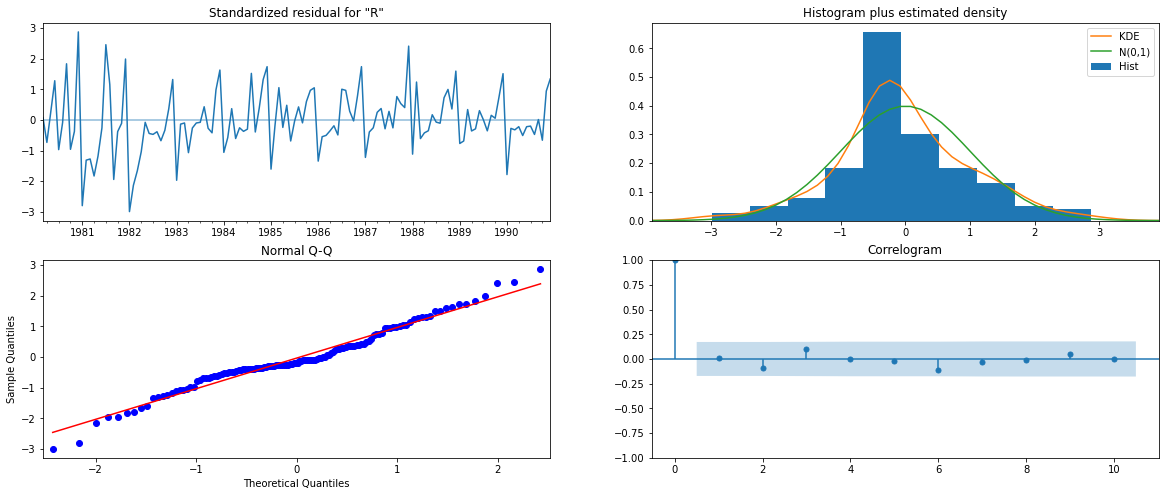

In [508]:
results_auto_ARIMA1.plot_diagnostics()
plt.show()


### ARIMA Test Model

In [509]:
predicted_auto_ARIMA1= results_auto_ARIMA1.forecast(steps=len(test))

In [510]:
rmse_auto_ARIMA = round(mean_squared_error(test['Rose'],predicted_auto_ARIMA1,squared=False),2)
print("RMSE of Automated ARIMA model on Test data is:",rmse_auto_ARIMA)


RMSE of Automated ARIMA model on Test data is: 56.93


In [511]:
resultsDf_auto_ARIMA = pd.DataFrame({'Test RMSE':rmse_auto_ARIMA}
                           ,index=['ARIMA Automated(1,1,2)'])

resultsDf=pd.concat([resultsDf,resultsDf_auto_ARIMA])
resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


###  SARIMA Train Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

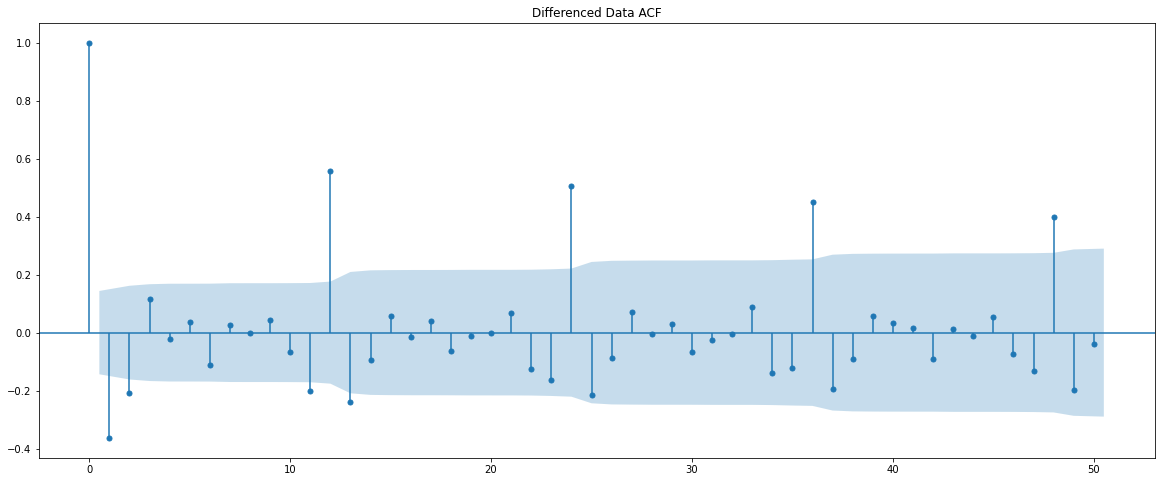

In [512]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data ACF')
plt.show()

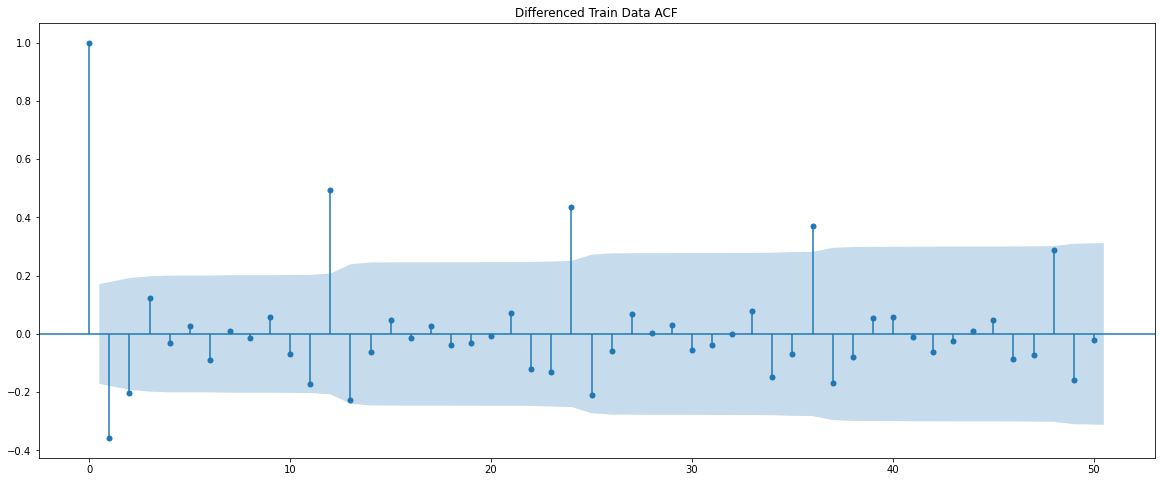

In [513]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Train Data ACF')
plt.show()

From the above ACF plot we can say that ,Seasonality after every 12th lag is visible. We will run our auto SARIMA models by setting seasonality both as 12.

### Setting the seasonality as 12 for the auto SARIMA model.

In [514]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [515]:
SARIMA_AIC1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC1

,param,seasonal,AIC


In [516]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model1 = sm.tsa.statespace.SARIMAX(train['Rose'].diff().dropna().values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA1 = SARIMA_model1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA1.aic))
        SARIMA_AIC1 = SARIMA_AIC1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1443.509745812702
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1247.0445014353718
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1071.7475155711654
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1270.9584807816843
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1061.2987537716654
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:935.5875437929088
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1240.6413561967206
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1221.3454764245707
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1061.9090245267987
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1077.5944760496122
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1069.30672858746
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:937.4990085645841
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1058.862666647728
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1060.8433878930894
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1052.0268464118903
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:949.4328023506954
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:942.110626944776
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:933.5036645996641
SARIMA(0, 1, 1)x(0, 

SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:909.2980373079408
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:924.0228717374569
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:917.0502463865581
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:786.8372249125918
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:901.0214273477881
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:902.1879120960502
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:895.3925092420736
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.2046045738582
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:787.4433378434231
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:779.0689143372258


In [517]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(0, 1, 2)","(2, 1, 2, 12)",775.378229
107,"(1, 1, 2)","(2, 1, 2, 12)",777.069145
161,"(2, 1, 2)","(2, 1, 2, 12)",779.068914
41,"(0, 1, 2)","(0, 1, 2, 12)",783.535250
47,"(0, 1, 2)","(1, 1, 2, 12)",783.577724


In [518]:

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].diff().dropna().values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  131
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.689
Date:                            Sun, 05 Jun 2022   AIC                            775.378
Time:                                    21:43:46   BIC                            792.954
Sample:                                         0   HQIC                           782.469
                                            - 131                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8916      0.054    -34.843      0.000      -1.998      -1.785
ma.L2          0.9077      0.055   

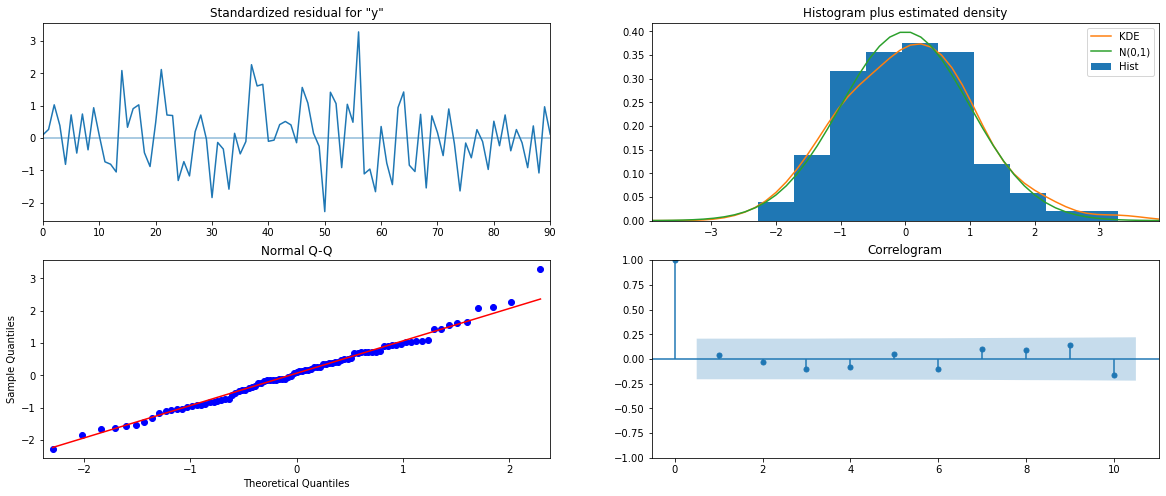

In [519]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()


## Predict on the Test Set using this model and evaluate the model.

In [520]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [521]:
rmse_autom_SARIMA = round(mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False),2)
print("RMSE of Automated SARIMA model on Test data is:",rmse_autom_SARIMA)

RMSE of Automated SARIMA model on Test data is: 61.44


In [522]:
resultsDf_auto_SARIMA = pd.DataFrame({'Test RMSE': [rmse_autom_SARIMA]}
                           ,index=['SARIMA Automated(0,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_auto_SARIMA])

resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


ACF is used for identifying the valueof q and PACF is used for identifying the value of 𝑝

In [523]:
print('The p value of the Augmented Dickey-Fuller Test on Train data:', round(adfuller(train, autolag='AIC')[1],6))

The p value of the Augmented Dickey-Fuller Test on Train data: 0.219476


The data isnt stationary


In [524]:
print('The p value of the Augmented Dickey-Fuller Test on Train data:',adfuller(train.diff().dropna(), autolag='AIC')[1])

The p value of the Augmented Dickey-Fuller Test on Train data: 7.061943750942e-09


The data after first difference is stationary. Thus we can consider the value of d as 1.


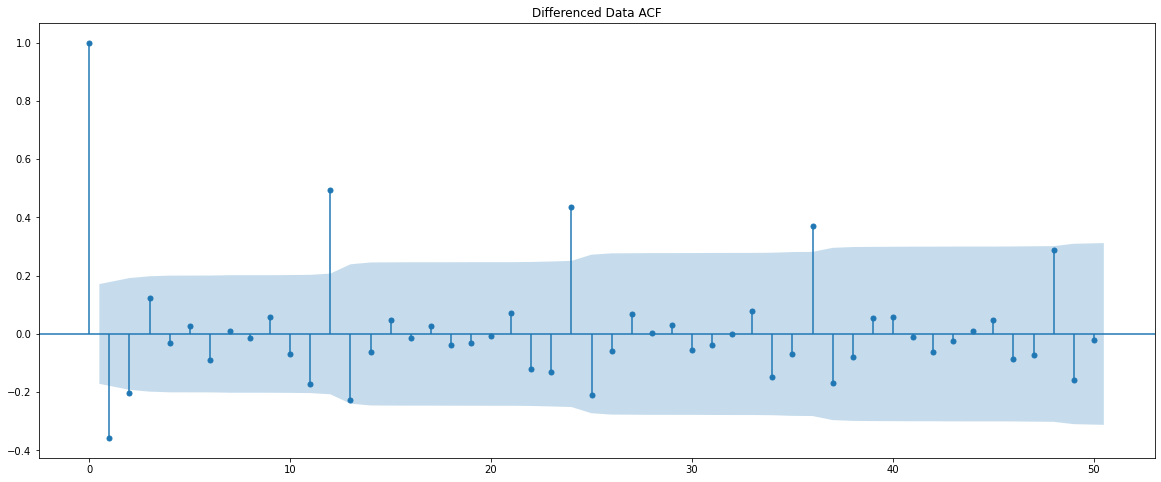

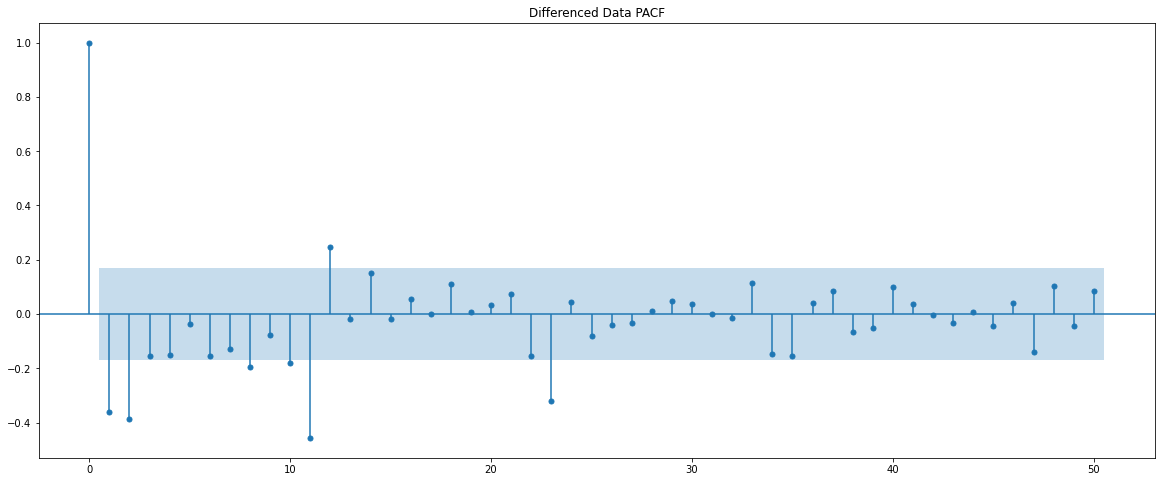

In [525]:
plot_acf(train['Rose'].diff().dropna(),alpha=0.05,lags=50,title='Differenced Data ACF')
plot_pacf(train['Rose'].diff().dropna(),alpha=0.05,lags=50,title='Differenced Data PACF')
plt.show()

After first differencing the ACF plot suggests that there is strong seasonality present which is tailing off. Hence we need to consider a Seasonal First Difference of 12 (as observed in the initial plots) must be used for a proper model.
For building an ARIMA model we cannot consider seasonality, hence we will consider the first difference plots to decide on the AR(p) and MA(q) terms.

 From the acf plot it may be observed that till lag-2 significant lags are present and after lag-2 the lags are insignificant. So MA (q) term may be taken as 2. Hence q is 2.
    
From the pacf plot it may be observed that till lag-2 significant lags are present and after lag-2 the lags are insignificant. So AR (p) term may be taken as 2. Hence p is 2.
    
ARIMA - From plots we can see that p = 2 and q = 2 with d = 1
    




### ARIMA Model Manual
The (p,d,q) values as observed from above are (2,1,2)

In [526]:
manual_ARIMA = ARIMA(train['Rose'].diff().dropna().values, order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -634.683
Date:                Sun, 05 Jun 2022   AIC                           1279.367
Time:                        21:43:49   BIC                           1293.704
Sample:                             0   HQIC                          1285.192
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2191      0.069      3.172      0.002       0.084       0.354
ar.L2         -0.0740      0.084     -0.879      0.380      -0.239       0.091
ma.L1         -1.9952      1.443     -1.383      0.1

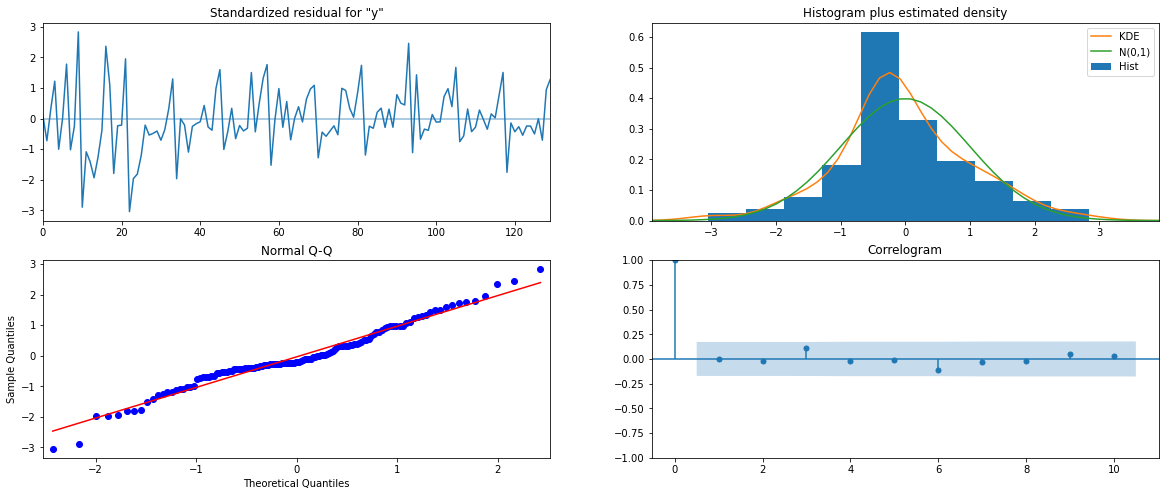

In [527]:
results_manual_ARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [528]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))


In [529]:
rmse_manual_ARIMA = round(metrics.mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False),2)
print("RMSE of Manual ARIMA model on Test data is:",rmse_manual_ARIMA)

RMSE of Manual ARIMA model on Test data is: 56.97


In [530]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [rmse_manual_ARIMA]}
                           ,index=['ARIMA Manual(2,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf_manual_ARIMA])

resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


### SARIMA Model Manual

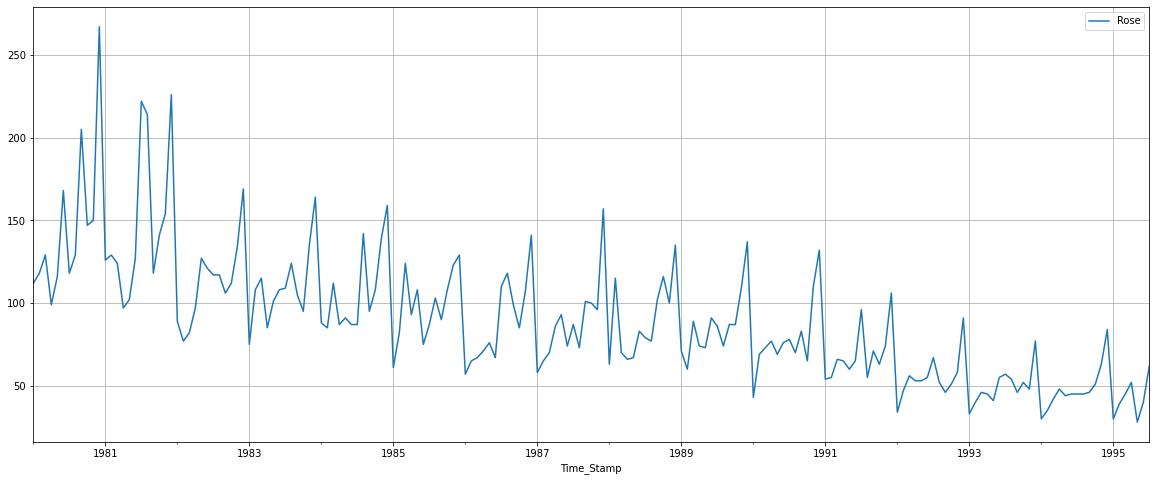

In [531]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

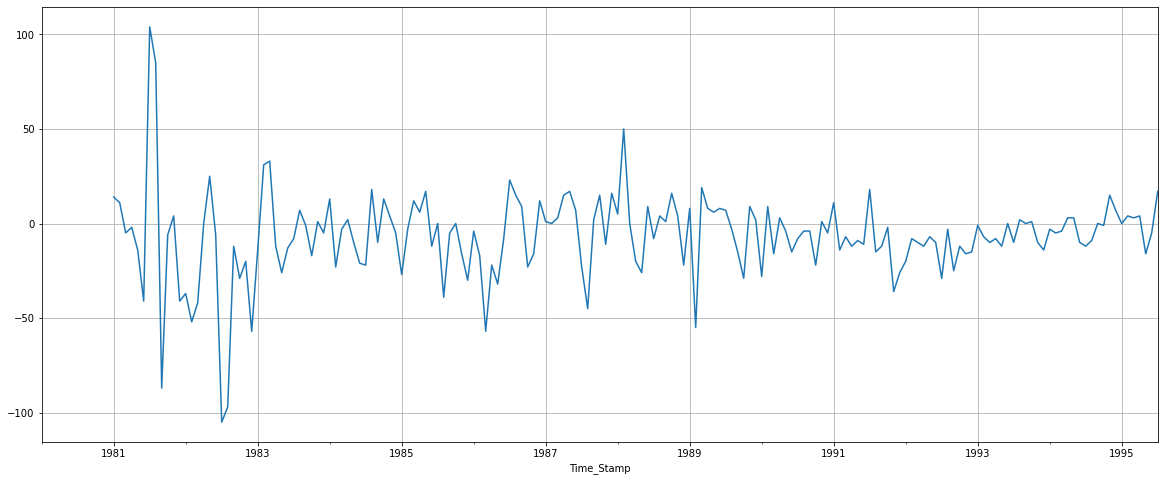

In [532]:
(df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

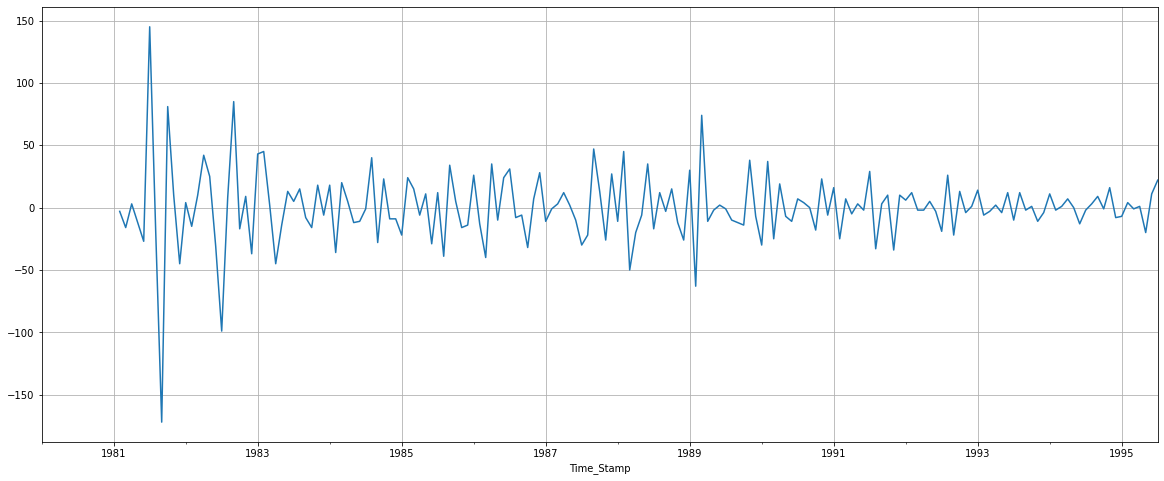

In [533]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

In [534]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



Checking the ACF and the PACF plots for the new modified Time Series.

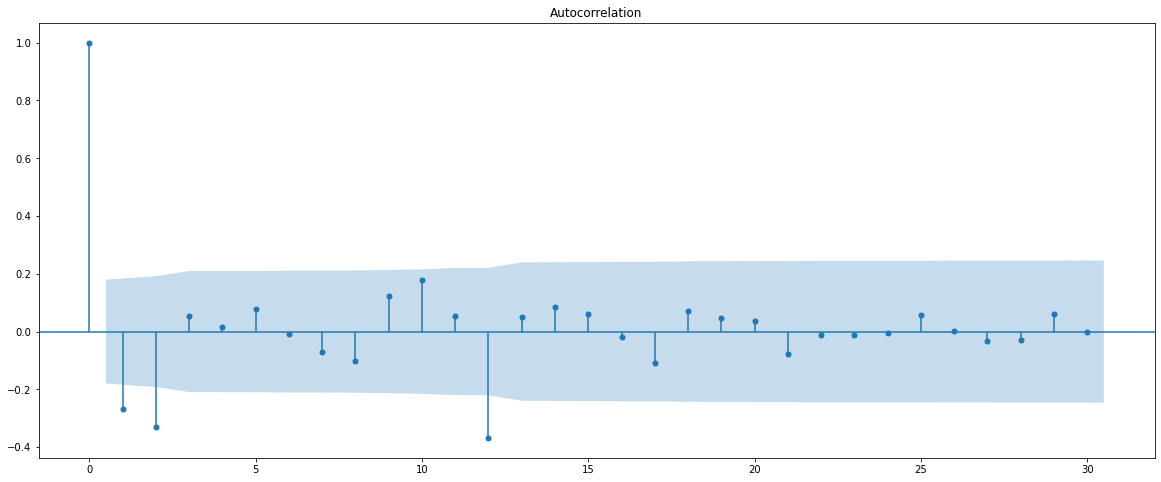

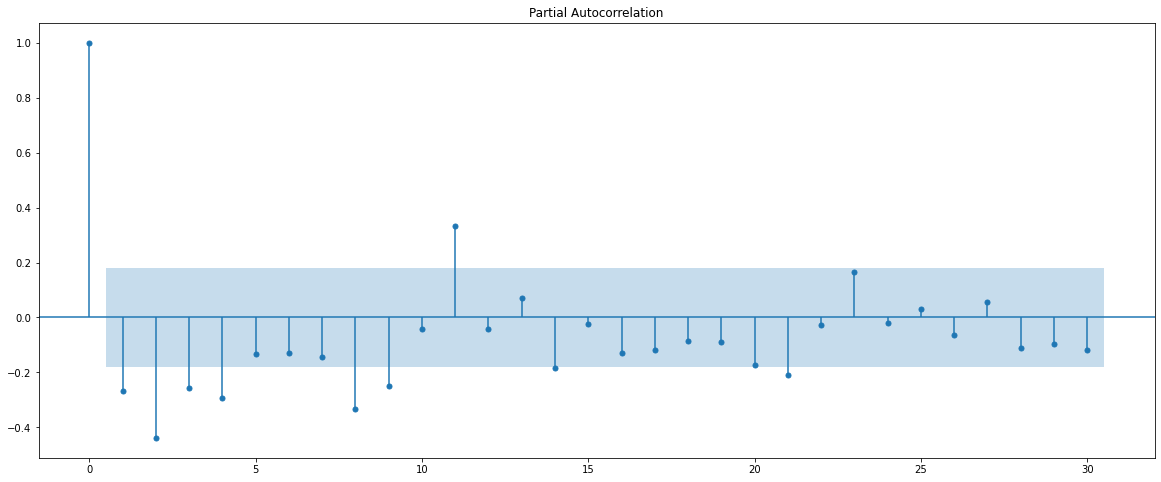

In [535]:
plot_acf((train['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((train['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [536]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].diff().dropna().values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  131
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -283.397
Date:                            Sun, 05 Jun 2022   AIC                            588.794
Time:                                    21:44:49   BIC                            613.209
Sample:                                         0   HQIC                           598.468
                                            - 131                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0906      0.161     -0.563      0.574      -0.406       0.225
ar.L2         -0.0851      0.160   

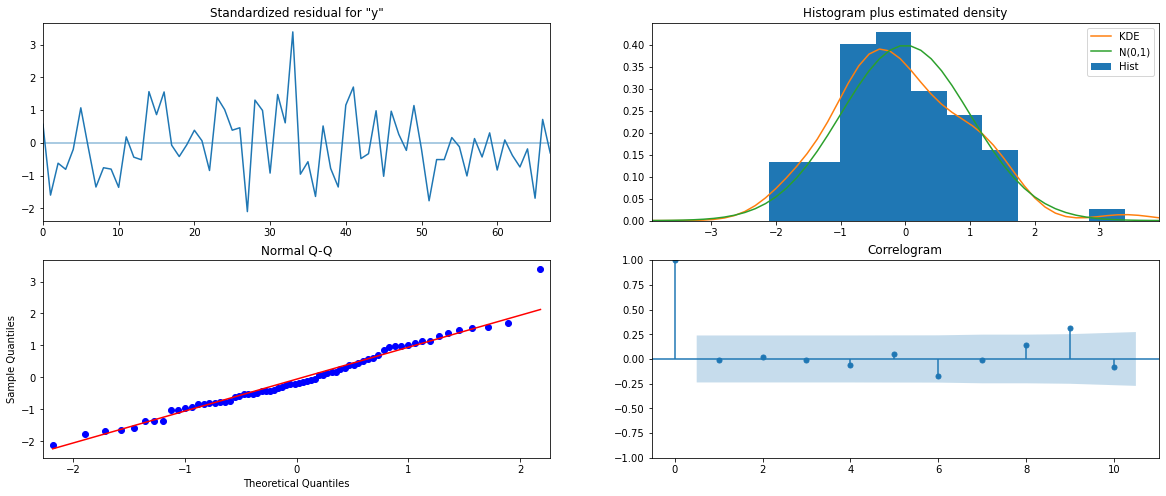

In [537]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

The model diagnostics plot looks good.

## Predict on the Test Set using this model and evaluate the model.

In [538]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [539]:
rmse_manual_SARIMA = round(metrics.mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False),2)
print("RMSE of Manual SARIMA model on Test data is:",rmse_manual_SARIMA)

RMSE of Manual SARIMA model on Test data is: 60.24


In [540]:
resultsDf_manual_SARIMA = pd.DataFrame({'Test RMSE': [rmse_manual_SARIMA]}
                           ,index=['SARIMA Manual(2,1,2)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_manual_SARIMA])

resultsDf

,Test RMSE
"Alpha=0.099,SES Autofit",36.82
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
RegressionOnTime,15.28
NaiveModel,79.74


This is where our model building exercise ends. 

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [541]:
resultsDf.sort_values(by=['Test RMSE'])


,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.1,TES Iterative Multiplicative Seas",9.24
"Alpha=0.1,Beta=0.4,Gamma=0.3,TES Iterative Additive Seas",11.97
"Alpha=0.09,Beta=0.0002,Gamma=0.003:TES Autofit",14.26
"Alpha=1.49e-08,Beta=1.66e-10:DES Autofit",15.28
RegressionOnTime,15.28
"Alpha=0.072,Beta=0,.045,Gamma=7.24e-05 TES Autofit",20.18
12pointTrailingMovingAverage,29.70
"Alpha=0.099,SES Autofit",36.82
Alpha=0.1 SES Iterative,36.85
"Alpha=0.1 , Beta=0.1,DES Iterative",36.90


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [542]:
model_TES_m_final = ExponentialSmoothing(df,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_m_final = model_TES_m_final.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1,optimized=False,use_brute=True)
print(model_TES_m_final.params)


{'smoothing_level': 0.1, 'smoothing_trend': 0.2, 'smoothing_seasonal': 0.1, 'damping_trend': nan, 'initial_level': 145.27499999999992, 'initial_trend': 0.7643939393939481, 'initial_seasons': array([0.75572235, 0.80417408, 0.89051255, 0.75964172, 0.88067767,
       0.92553586, 1.08905952, 1.13538639, 1.03030222, 0.96585715,
       1.13788391, 1.62524659]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [543]:
TES_m_predict_final =  model_TES_m_final.forecast(12)
TES_m_predict_final

1995-08-01    50.069586
1995-09-01    49.881664
1995-10-01    50.329708
1995-11-01    58.986272
1995-12-01    82.144647
1996-01-01    33.792922
1996-02-01    40.727006
1996-03-01    46.134207
1996-04-01    44.842350
1996-05-01    43.316218
1996-06-01    47.760119
1996-07-01    55.008885
Freq: MS, dtype: float64

In [544]:
pd_rose_ci = pd.DataFrame({'lower_CI':TES_m_predict_final - 1.96*np.std(model_TES_m_final.resid,ddof=1),
                          'prediction':TES_m_predict_final,
                          'upper_ci': TES_m_predict_final + 1.96*np.std(model_TES_m_final.resid,ddof=1)})


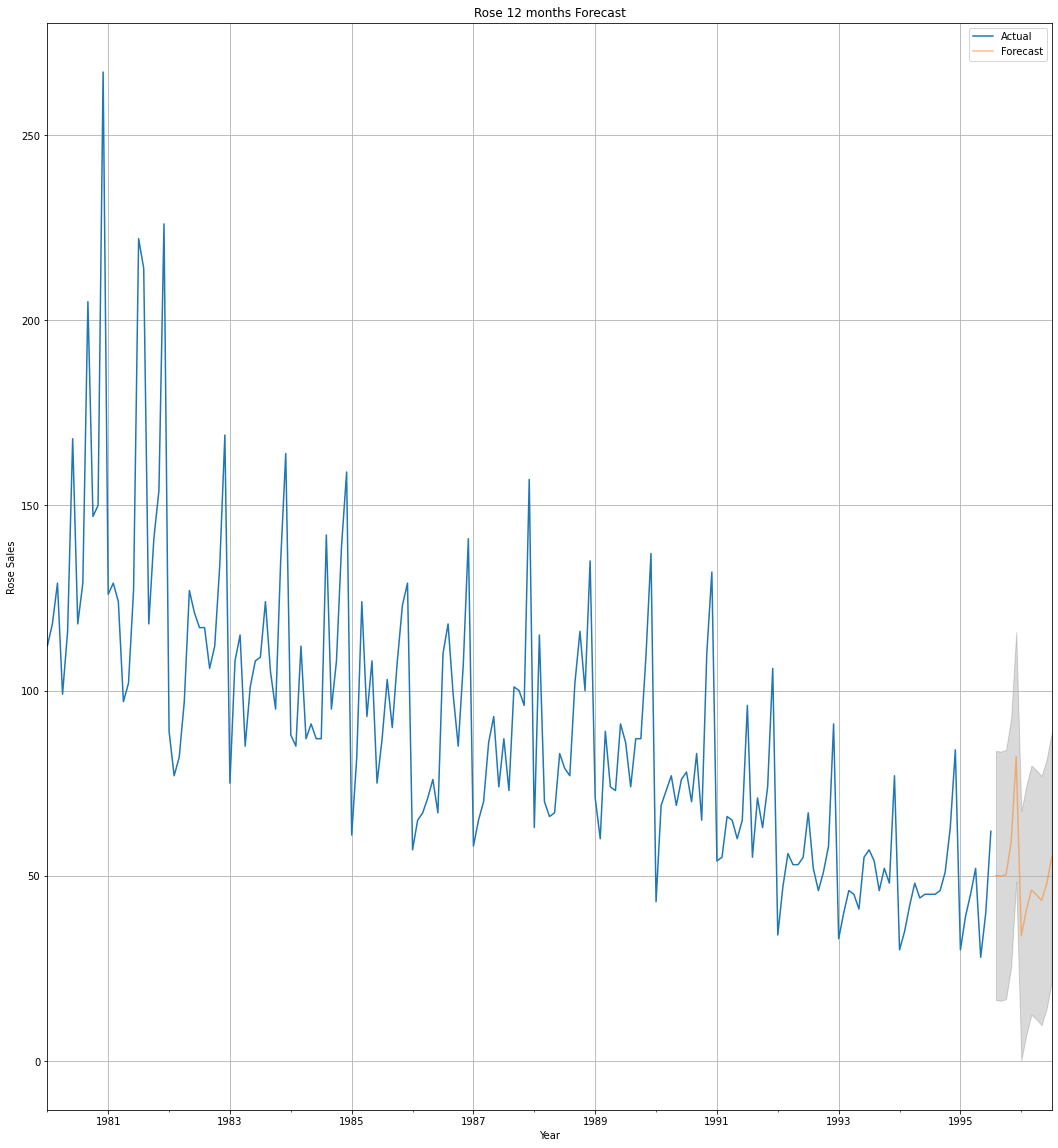

In [545]:
axis = df['Rose'].plot(label='Actual', figsize=(18,20))
TES_m_predict_final.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(TES_m_predict_final.index, pd_rose_ci['lower_CI'], pd_rose_ci['upper_ci'], color='k', alpha=.15)
plt.title('Rose 12 months Forecast')

axis.set_xlabel('Year')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


1. First  read the data as a time series and plotted it on a graph to show how sales for Sparkling wines over the years. 

2. Then performed some exploratory data analyses on the data sets, creating various types of charts for analyze the sales. The missing values are also imputed.

3. I split the data into test(data after the year 1991) and train(data before the year 1991).

4. Next I built the following  models :
• Simple Exponential Smoothing Model 
• Iterative Simple Exponential Smoothing Model 
• Double Exponential Smoothing Model
• Iterative Double Exponential Smoothing Model
• Triple Exponential Smoothing Model
• Iterative Triple Exponential Smoothing Model.
• Linear Regression Model 
• Naïve Approach 
• Simple Average Model 
• Moving Average Model
For all the above models RMSE value was calculated to understand the performance.

5. The stationarity of the data was checked by stating hypothesis for statistical testing and using ADF Test.

6. From here, we build ARIMA and SARIMA models, but first we examine the dataset. If the series is not stationary, we take the first difference of the series and converted into a stationary series.

7. The ARIMA/SARIMA models are built using AIC scores, we select the parameter with the least AIC and the model is built with it. RMSE is also calculated to check the performance.

8. The ARIMA/SARIMA models are built manually by calculating value of p,q,P,Q,s,d,D from ACF , PACF graph. RMSE is also calculated to check the performance.

9. Finally, we take the model with minimum RMSE value and build the most optimum model on the complete data .The sales for the next 12 months in future with 95% confidence intervals is predicted.

### Recommendations

--> Fourth quarter has the highes sales among other quarter. So the company can stock up the wines in the second quarter itself to prepare themselves to supply the high demand in the fourth quarter.

--> Proper branding advertising in leading newspaper and magazines can be done. Social Media Advertising can also be done to improve the sales in the first 3 quarters.

--> First quarter has the lowest sales . So coupons and differs can be offered to boost up the sales.

--> Over the years sales are decreasing this can be due to more competition with new companies. As time progresses the wine company must bring in unique tastes.

--> Further information like age group,location of the customers can be analyzed to improve the model performance and get a better understanding of the Rose wine sales.